In [2]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import pymysql

from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

In [6]:
def pie_graph(ratio, labels, name):
    colors = ['silver', 'gold', 'whitesmoke', 'lightgray']
    plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
    plt.title(name, size = 20)
    plt.show()

In [4]:
df = pd.read_csv("temp_work_net_AI.csv")
AI_df = df.drop('Unnamed: 0', axis=1)
AI_df.tail()

모집직종                                               직무내용  \
195             -                     바이오/제약/식품, 빅데이터/AI, DBA/데이터베이스   
196             -                      기획/전략/경영, 네트워크/서버/보안, 빅데이터/AI   
197             -  기획/전략/경영, 바이오/제약/식품, 빅데이터/AI, 사무/총무/법무, 생산/제조/...   
198  웹기획,서비스기획·운영  [주요업무] • AI 서비스의 S/W 개발과 관련된 프로젝트 기획 및 수행관리 • ...   
199             -  ㆍ 정형/비정형 문서의 인식 모델 개발 ㆍ AI 엔진 성능 향상을 위한 딥러닝 모델...   

              경력조건      학력 전공 자격면허 우대조건  
195             무관      석사  -    -    -  
196             무관    학력무관  -    -    -  
197             무관  대졸(4년)  -    -    -  
198  경력 (최소 3년 이상)  대졸(4년)  -    -    -  
199  경력 (최소 5년 이상)    학력무관  -    -    -

In [11]:
AI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   모집직종    200 non-null    object  
 1   직무내용    200 non-null    object  
 2   경력조건    200 non-null    category
 3   학력      200 non-null    category
 4   전공      200 non-null    object  
 5   자격면허    200 non-null    object  
 6   우대조건    200 non-null    object  
dtypes: category(2), object(5)
memory usage: 9.4+ KB


In [10]:
AI_df = AI_df.astype({'경력조건':'category', '학력':'category'})

## 규티빠띠 cloud 그리기

In [13]:
title_list = list(AI_df["직무내용"])

[('-', 'Punctuation')]
--------------------------------------------------------------------------------
[('[', 'Punctuation'), ('담당', 'Noun'), ('업무', 'Noun'), (']', 'Punctuation'), ('•', 'Foreign'), ('컴퓨터', 'Noun'), ('비전', 'Verb'), ('및', 'Noun'), ('AI', 'Alpha'), ('분야', 'Noun'), ('논문', 'Noun'), ('조사', 'Noun'), ('및', 'Noun'), ('요약', 'Noun'), ('•', 'Foreign'), ('DCNN', 'Alpha'), ('기반', 'Noun'), ('영', 'Modifier'), ('상처리', 'Noun'), ('AI', 'Alpha'), ('엔진', 'Noun'), ('개발', 'Noun'), ('혹은', 'Adverb'), ('RNN', 'Alpha'), ('기반', 'Noun'), ('신호처리', 'Noun'), ('AI', 'Alpha'), ('엔진', 'Noun'), ('개발', 'Noun'), ('•', 'Foreign'), ('AI', 'Alpha'), ('학습', 'Noun'), ('데이터', 'Noun'), ('관련', 'Noun'), ('유틸리티', 'Noun'), ('스크립트', 'Noun'), ('및', 'Noun'), ('툴', 'Noun'), ('개발', 'Noun'), ('[', 'Punctuation'), ('자격', 'Noun'), ('요건', 'Noun'), (']', 'Punctuation'), ('•', 'Foreign'), ('학력', 'Noun'), (':', 'Punctuation'), ('석사', 'Noun'), ('이상', 'Noun'), ('•', 'Foreign'), ('전공', 'Noun'), (':', 'Punctuation'), ('이공', 'Noun')

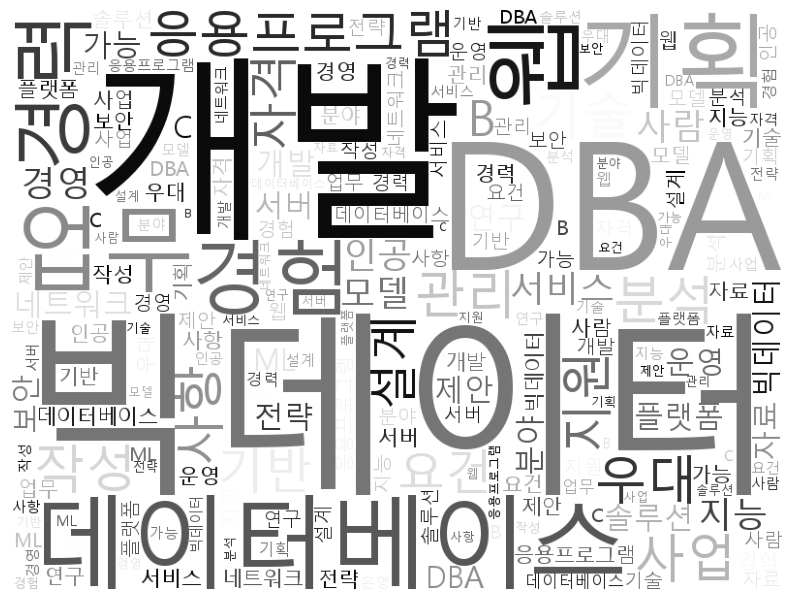

In [16]:

def make_wordcloud(title_list, stopwords, word_count):  # 딕셔너리로 만듦
    okt = Okt()
    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 80)
    noun_adj_list = []
    # 명사와 형용사만 구분하여 리스트에 추가
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective', "Alpha"]:
                noun_adj_list.append(word)
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print('-' * 80)
    print(tags)
    tag_dict = dict(tags)
    # 검색어 제외 방법 2: dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin':  # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    # img_mask = np.array(Image.open('cloud.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                          background_color="white", max_font_size=200,
                          repeat=True,
                          colormap='gist_gray')
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


if __name__ == '__main__':
    #search_word = "ChatGPT"  # 검색어 지정
    #title_list = []
    stopwords = ['AI','데이터', "및", "이상", "등", "관련", "분", "위", "있으신", "티스", "트", "직업", "정보"]  # wordcloud에서 제외할 단어
    # 1~200번게시글 까지 크롤링
    #get_titles(1, 200, search_word, title_list)
    # 단어 50개까지 wordcloud로 출력
    make_wordcloud(title_list, stopwords, 50)

[('-', 'Punctuation')]
--------------------------------------------------------------------------------
[('[', 'Punctuation'), ('담당', 'Noun'), ('업무', 'Noun'), (']', 'Punctuation'), ('•', 'Foreign'), ('컴퓨터', 'Noun'), ('비전', 'Verb'), ('및', 'Noun'), ('AI', 'Alpha'), ('분야', 'Noun'), ('논문', 'Noun'), ('조사', 'Noun'), ('및', 'Noun'), ('요약', 'Noun'), ('•', 'Foreign'), ('DCNN', 'Alpha'), ('기반', 'Noun'), ('영', 'Modifier'), ('상처리', 'Noun'), ('AI', 'Alpha'), ('엔진', 'Noun'), ('개발', 'Noun'), ('혹은', 'Adverb'), ('RNN', 'Alpha'), ('기반', 'Noun'), ('신호처리', 'Noun'), ('AI', 'Alpha'), ('엔진', 'Noun'), ('개발', 'Noun'), ('•', 'Foreign'), ('AI', 'Alpha'), ('학습', 'Noun'), ('데이터', 'Noun'), ('관련', 'Noun'), ('유틸리티', 'Noun'), ('스크립트', 'Noun'), ('및', 'Noun'), ('툴', 'Noun'), ('개발', 'Noun'), ('[', 'Punctuation'), ('자격', 'Noun'), ('요건', 'Noun'), (']', 'Punctuation'), ('•', 'Foreign'), ('학력', 'Noun'), (':', 'Punctuation'), ('석사', 'Noun'), ('이상', 'Noun'), ('•', 'Foreign'), ('전공', 'Noun'), (':', 'Punctuation'), ('이공', 'Noun')

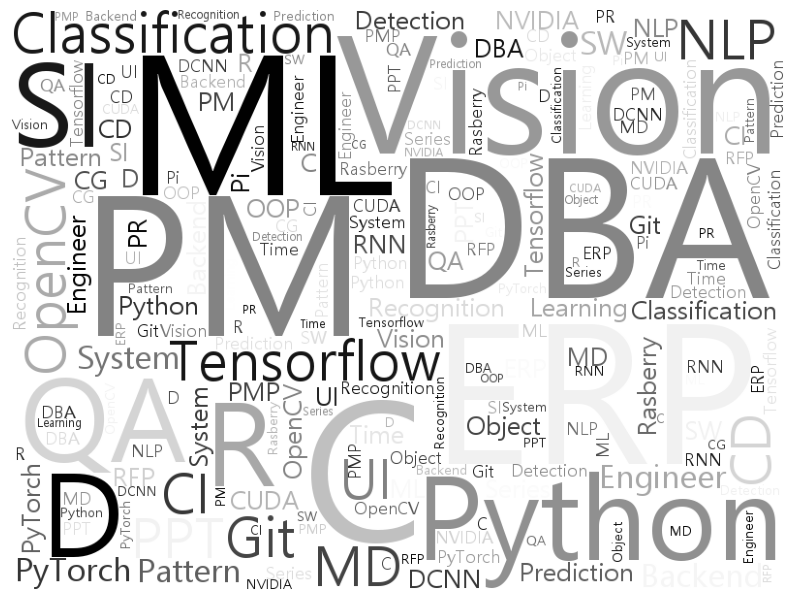

In [20]:
def make_wordcloud(title_list, stopwords, word_count):  # 딕셔너리로 만듦
    okt = Okt()
    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 80)
    noun_adj_list = []
    # 명사와 형용사만 구분하여 리스트에 추가
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ["Alpha"]: #####################
                noun_adj_list.append(word)
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print('-' * 80)
    print(tags)
    tag_dict = dict(tags)
    # 검색어 제외 방법 2: dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin':  # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    img_mask = np.array(Image.open('cloud.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                          background_color="white", max_font_size=200,
                          repeat=True,
                          colormap='gist_gray')
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


if __name__ == '__main__':
    #search_word = "ChatGPT"  # 검색어 지정
    #title_list = []
    stopwords = ['AI', "및", "이상", "등", "관련", "분", "위", "있으신", "or", "B", "A", "W", "S"]  # wordcloud에서 제외할 단어
    # 1~200번게시글 까지 크롤링
    #get_titles(1, 200, search_word, title_list)
    # 단어 50개까지 wordcloud로 출력
    make_wordcloud(title_list, stopwords, 50)

## 경력조건 비율 알아보기

In [23]:
AI_df["경력조건"].value_counts()

무관                  143
경력 (최소 12개월 이상)      13
신입, 경력 (연수무관)         6
경력 (최소 5년 이상)         6
경력                    4
경력 (최소 3년 이상)         4
신입                    4
관계없음                  3
신입/경력                 3
경력 (최소 1년 이상) 우대      3
경력 (연수무관)             2
경력 (최소 2년 이상)         1
경력 (최소 4년 이상)         1
경력 (최소 24개월 이상)       1
경력 (최소 5년 이상) 우대      1
경력 (최소 7년 이상)         1
경력 (최소 1년 이상)         1
경력 (최소 15년 이상)        1
경력 (최소 10년 이상)        1
경력 (최소 3년 이상) 우대      1
Name: 경력조건, dtype: int64

In [27]:
sum(list(AI_df["경력조건"].value_counts()))

200

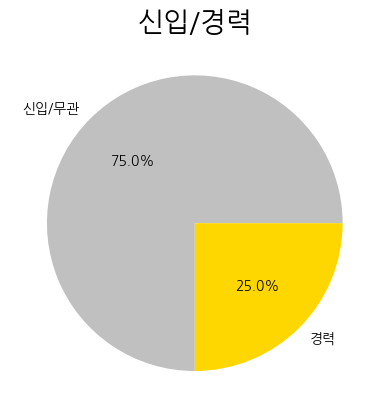

In [7]:
ratio = [(143+7), 50]
labels = ['신입/무관', '경력']

pie_graph(ratio, labels, "신입/경력")

## 학력 비율알아보기

In [30]:
AI_df["학력"].value_counts()

학력무관           111
대졸(4년)          45
석사              33
-                4
대졸(2~3년)         3
대졸(4년) ~ 박사      2
고졸 ~ 석사          1
박사               1
Name: 학력, dtype: int64

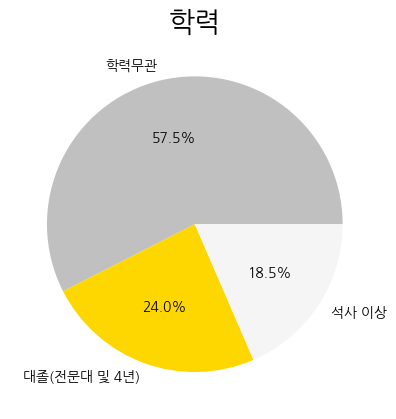

In [8]:
ratio = [115, (45+3), (33+4)]
labels = ['학력무관', '대졸(전문대 및 4년)', "석사 이상"]
pie_graph(ratio, labels, "학력")


In [9]:
AI_df["전공"].value_counts()

-                                                195
정보·통신공학(학과 : 네트워크전공) 정보·통신공학(학과 : 정보네트워크공학전공)      1
전자공학(학과 : 전기전자공학계열)                                1
전산학·컴퓨터공학(학과 : 컴퓨터공학과) 전산학·컴퓨터공학(학과 : 인공지능전공)      1
정보·통신공학(학과 : 데이터정보학과) 통계학(학과 : 데이터경영학과)            1
경영학(학과 : 경영정보학전공(경영대학)) 경영학(학과 : IT경영학부)           1
Name: 전공, dtype: int64

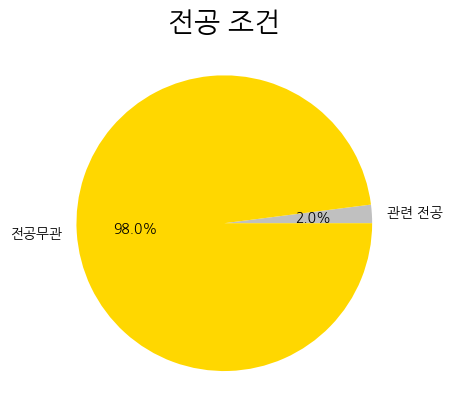

In [11]:
ratio = [4, 195]
labels = ['관련 전공', '전공무관']
title = "전공 조건"
pie_graph(ratio, labels, title)

<hr><hr><hr><hr><hr><hr><hr>

In [82]:
def draw_graph(df, name):
    plt.figure(figsize=(20, 10))
    # x = group_area.index.to_list()
    x = ["2013", "2015", "2017", "2019", "2021", "2023"]
    y = df.iloc[0].to_list()
    
    plt.plot(x, y, "k--")
    
    
    plt.xticks(rotation=70)
    # plt.ylim(220000, 350000)
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    
    plt.title(name, size = 30)
    # 숫자 넣는 부분
    idx = 0
    '''
    for rect in bar:
        height = rect.get_height()
        if idx < 8:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
        else:    
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
        idx += 1
    
    plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)
    '''
    plt.show()

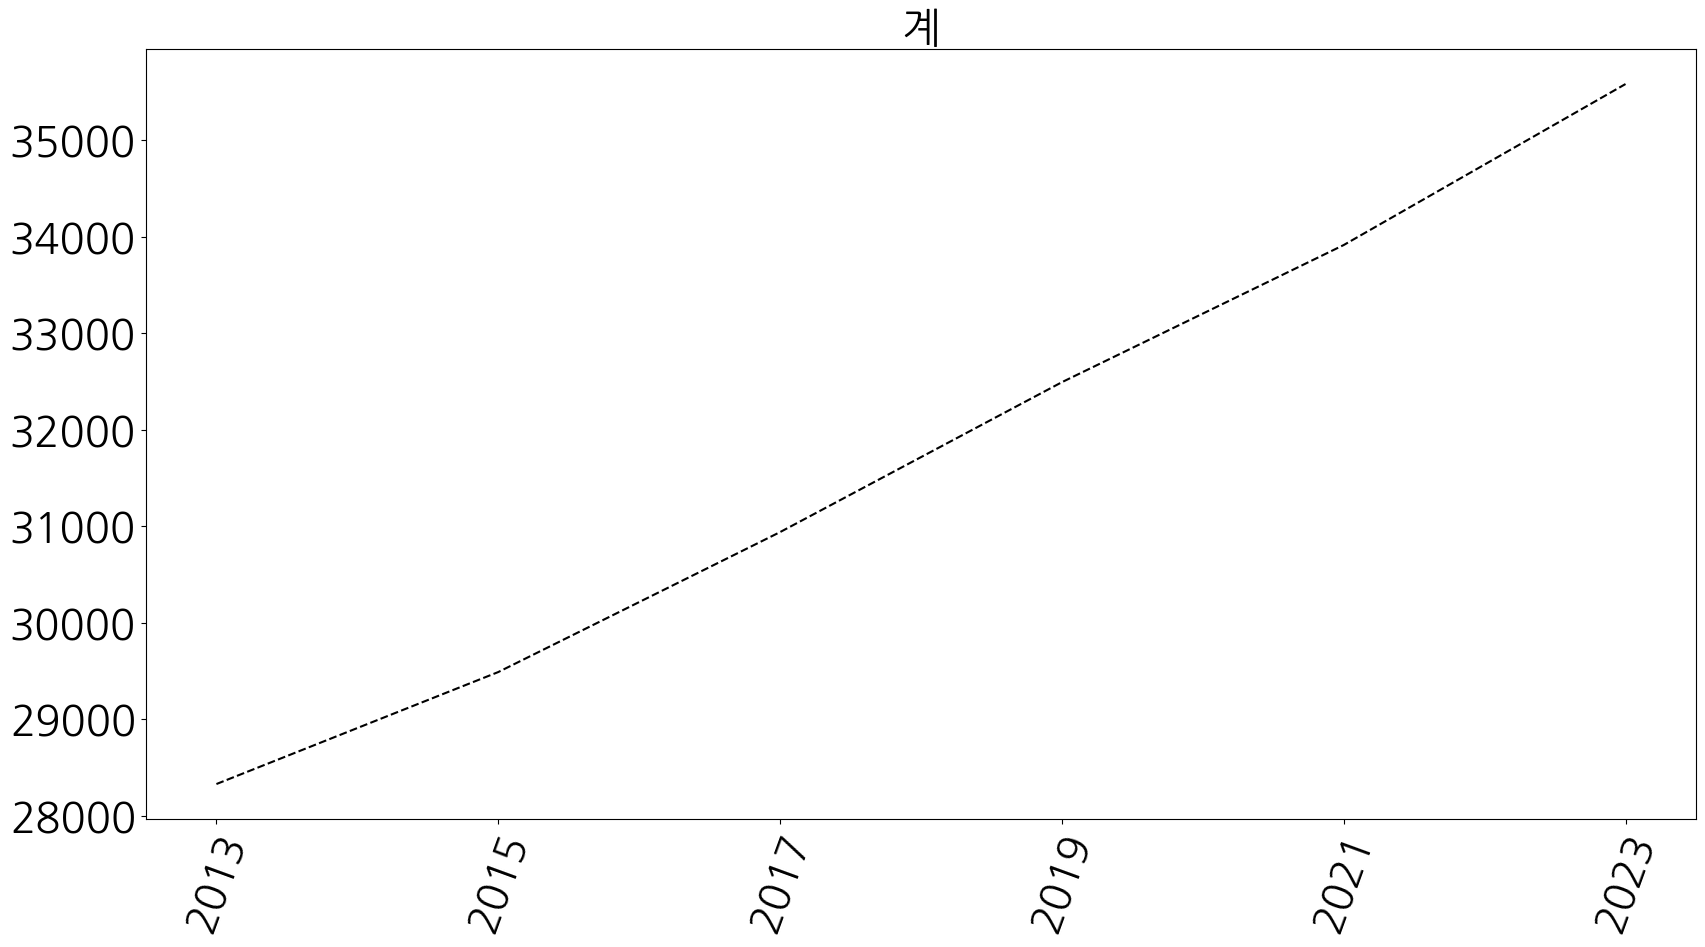

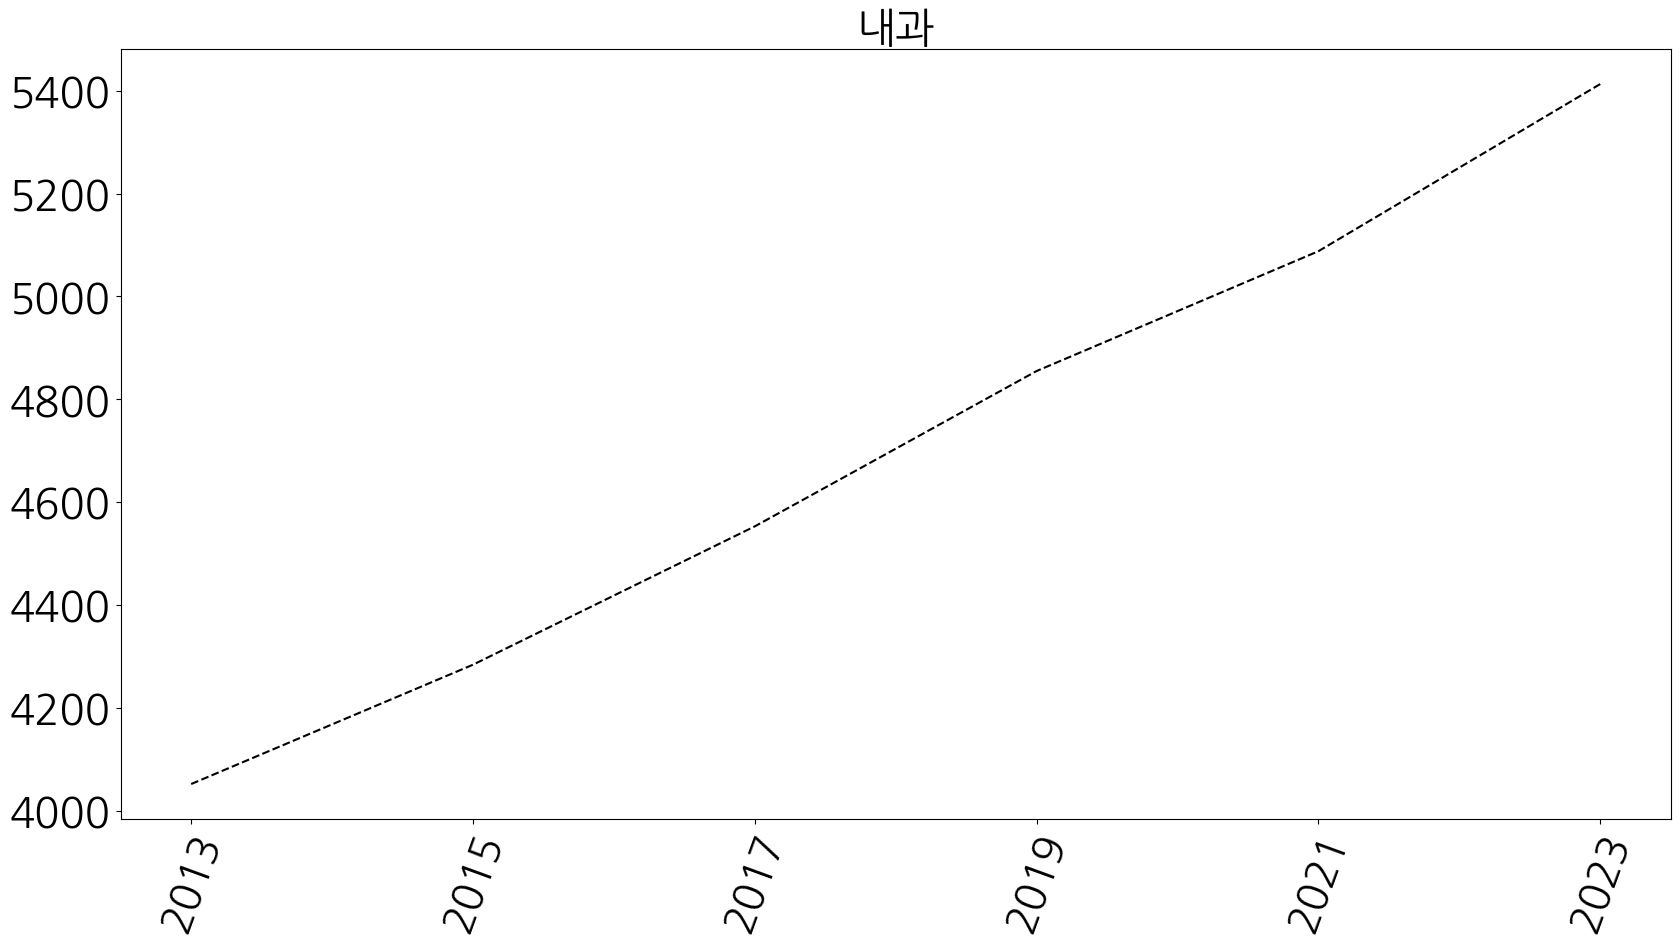

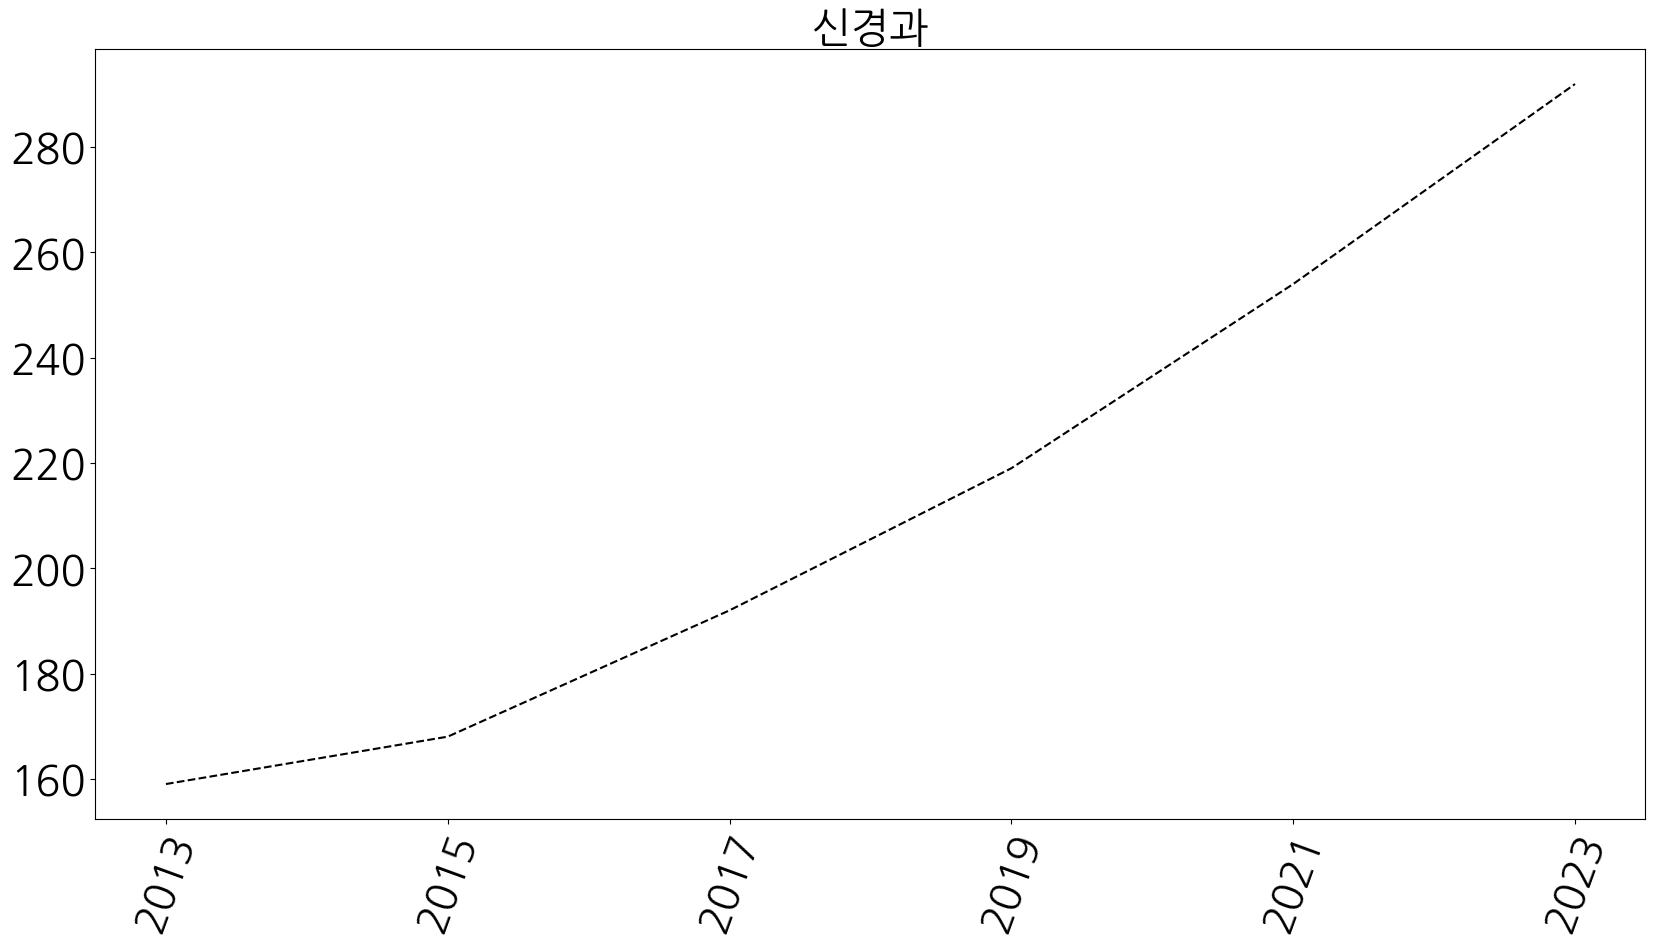

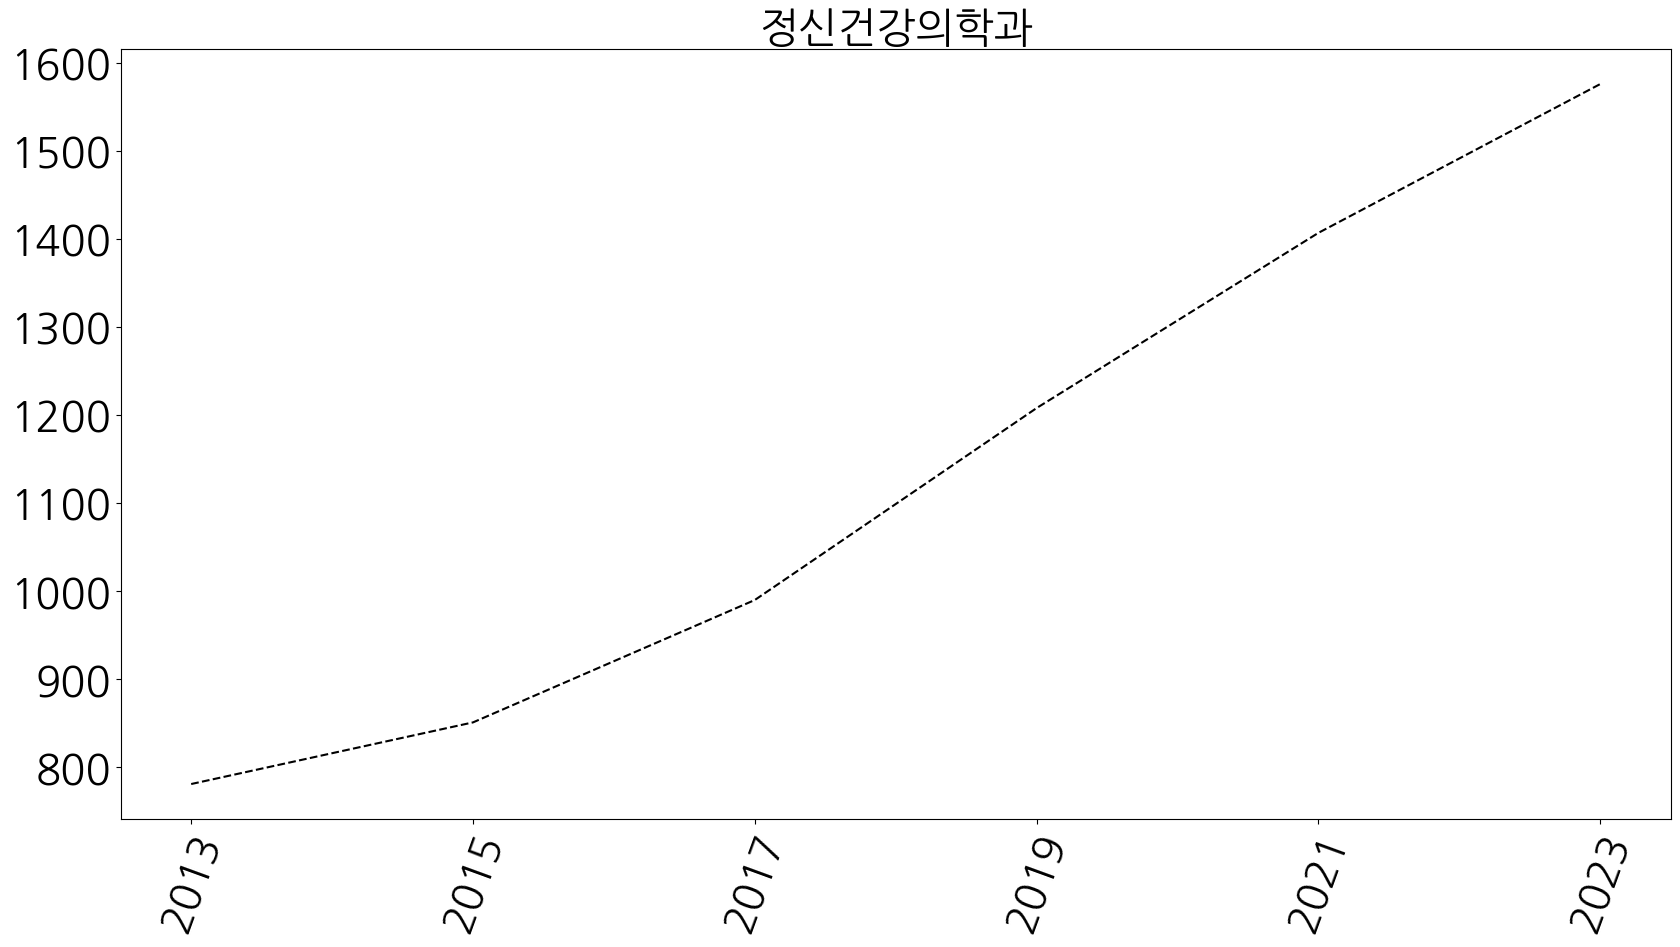

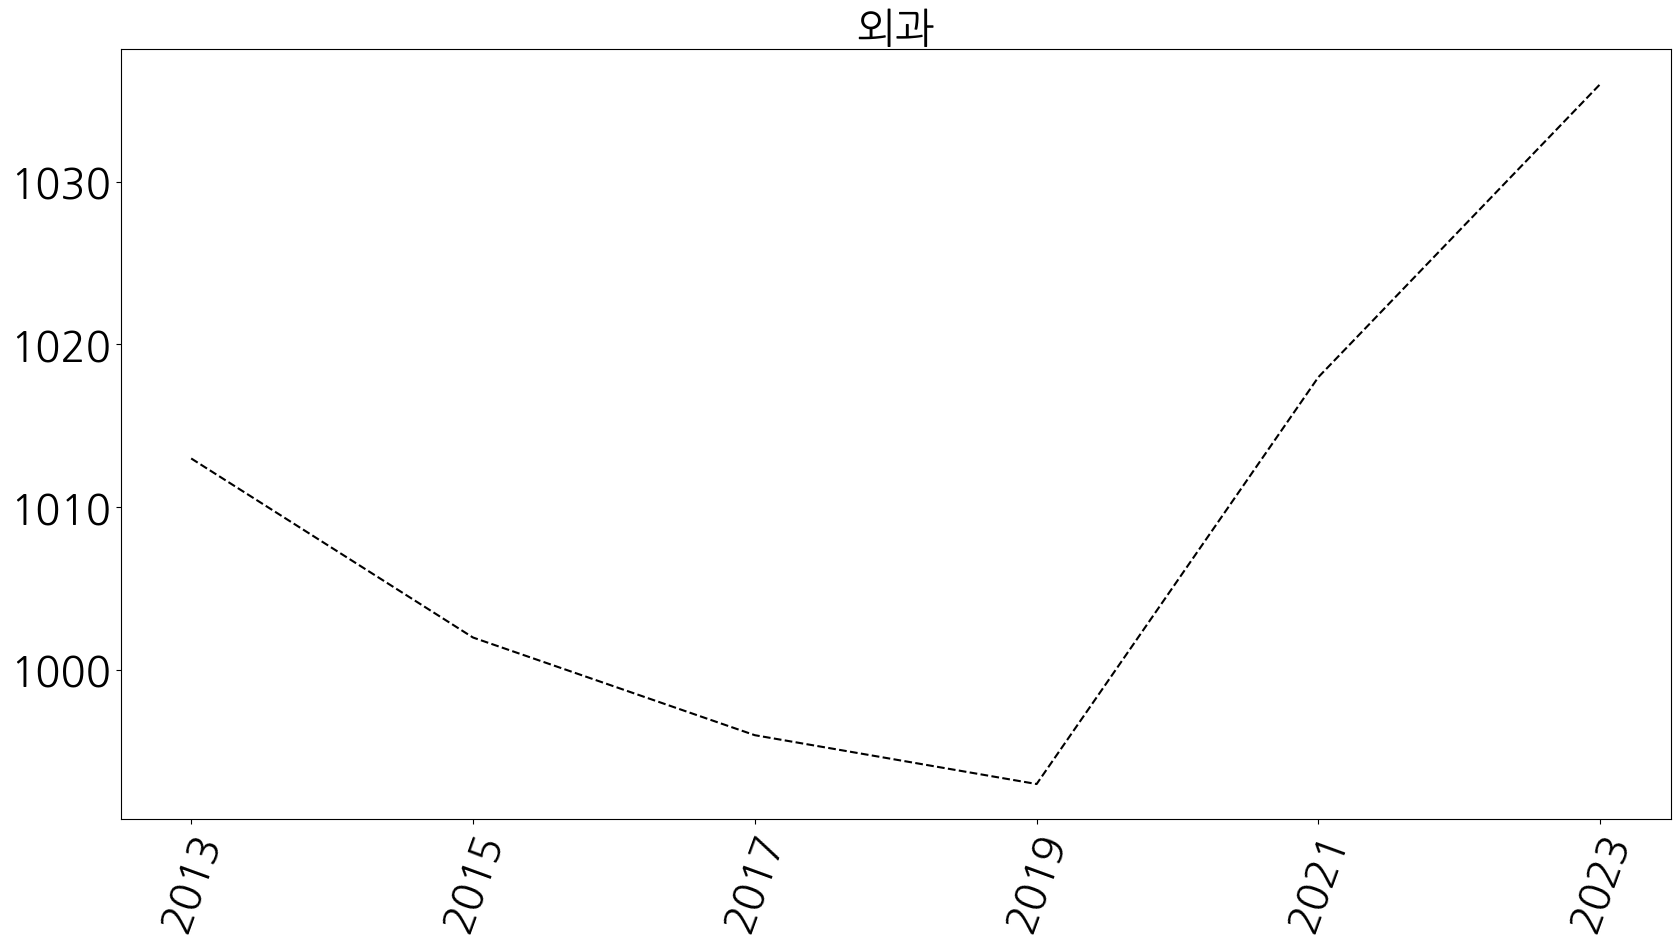

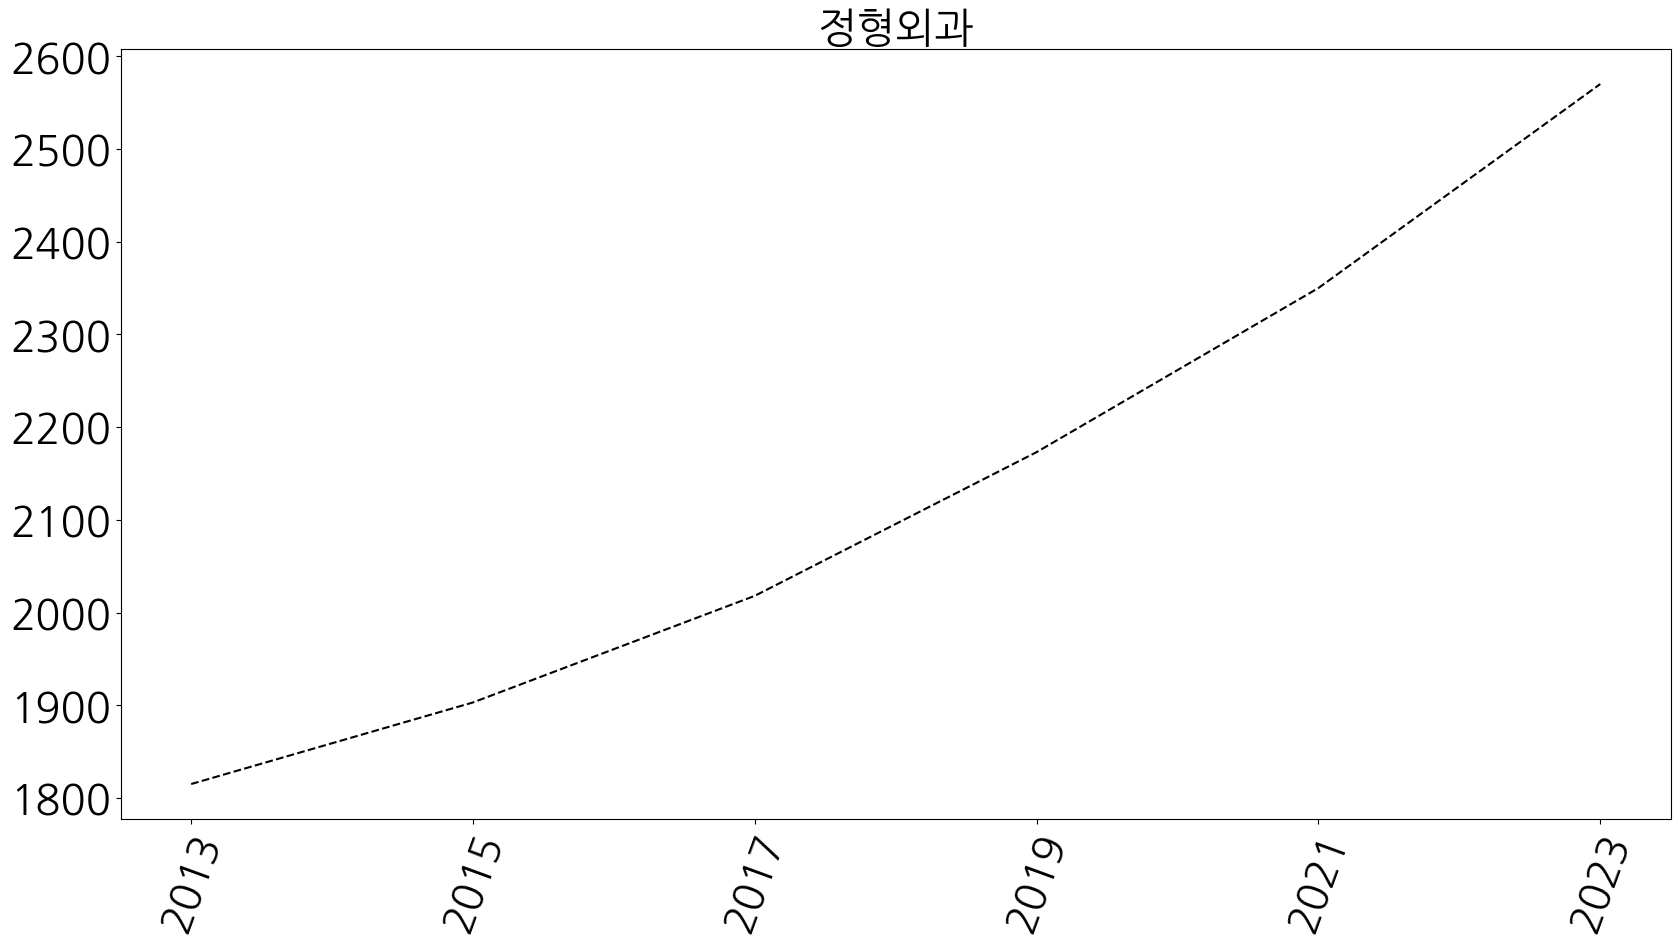

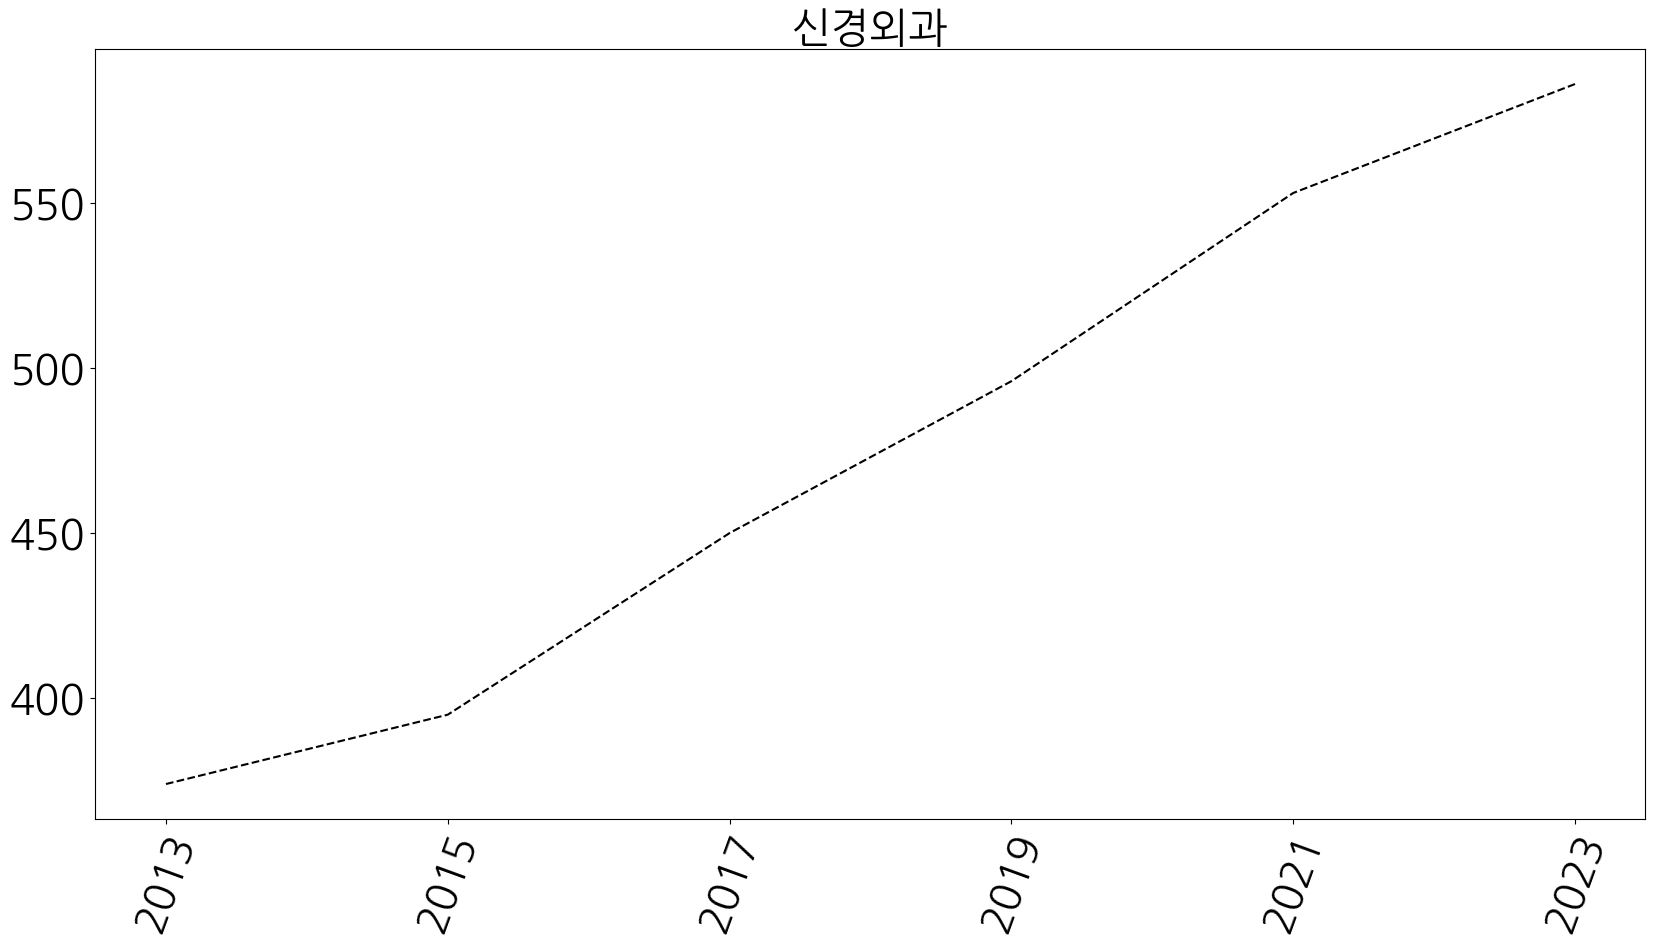

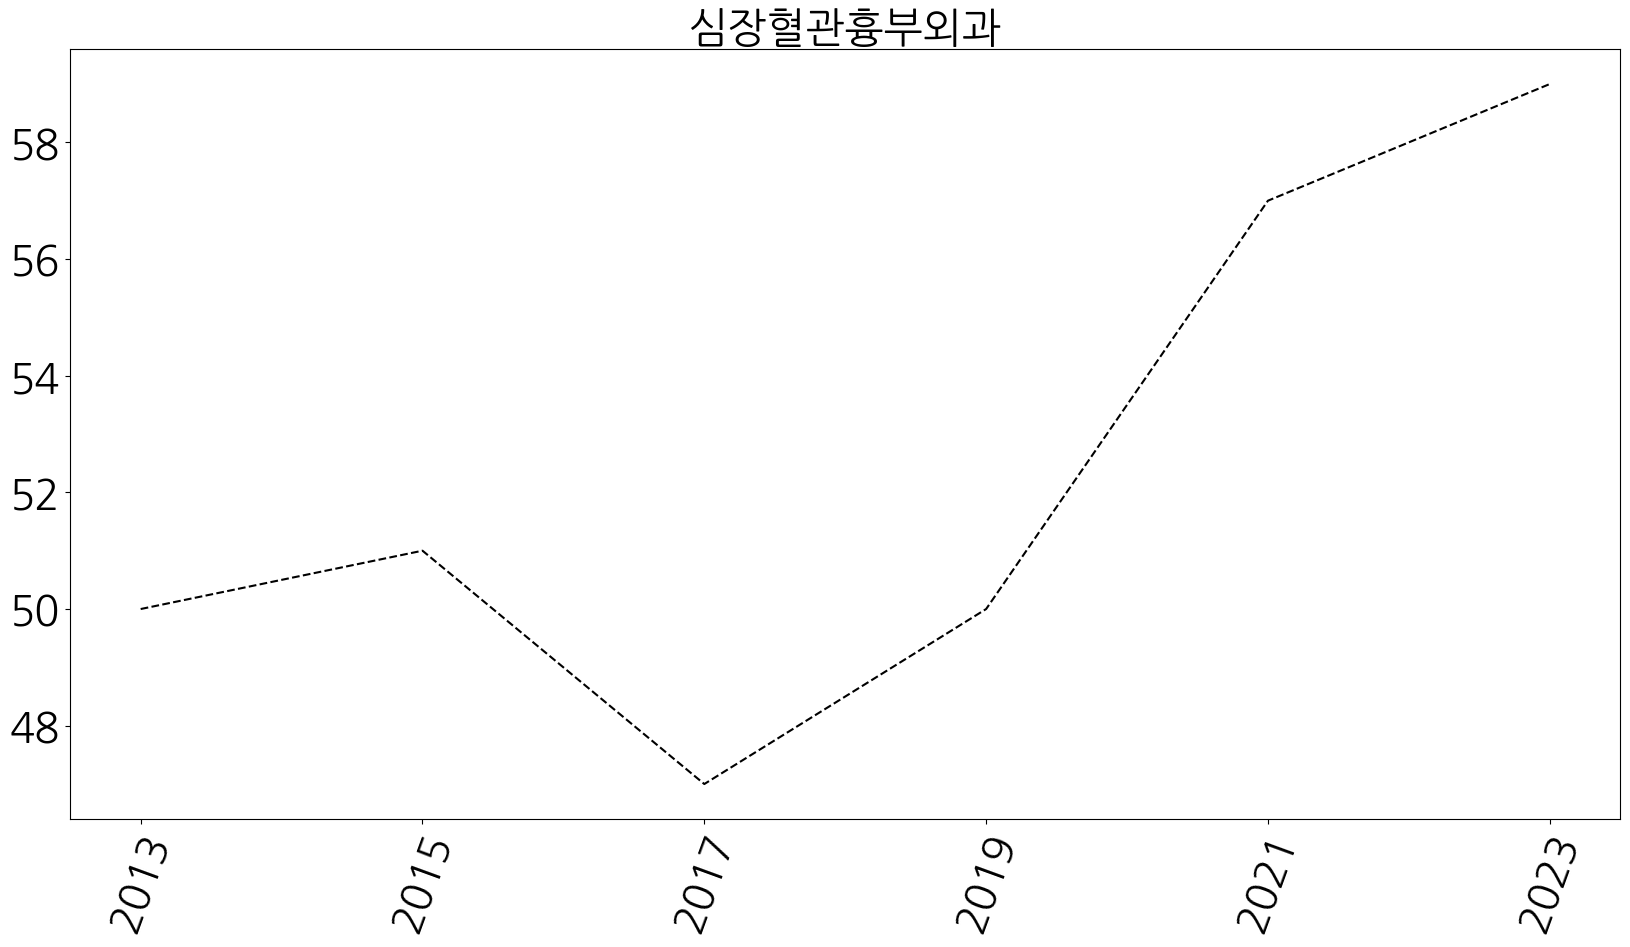

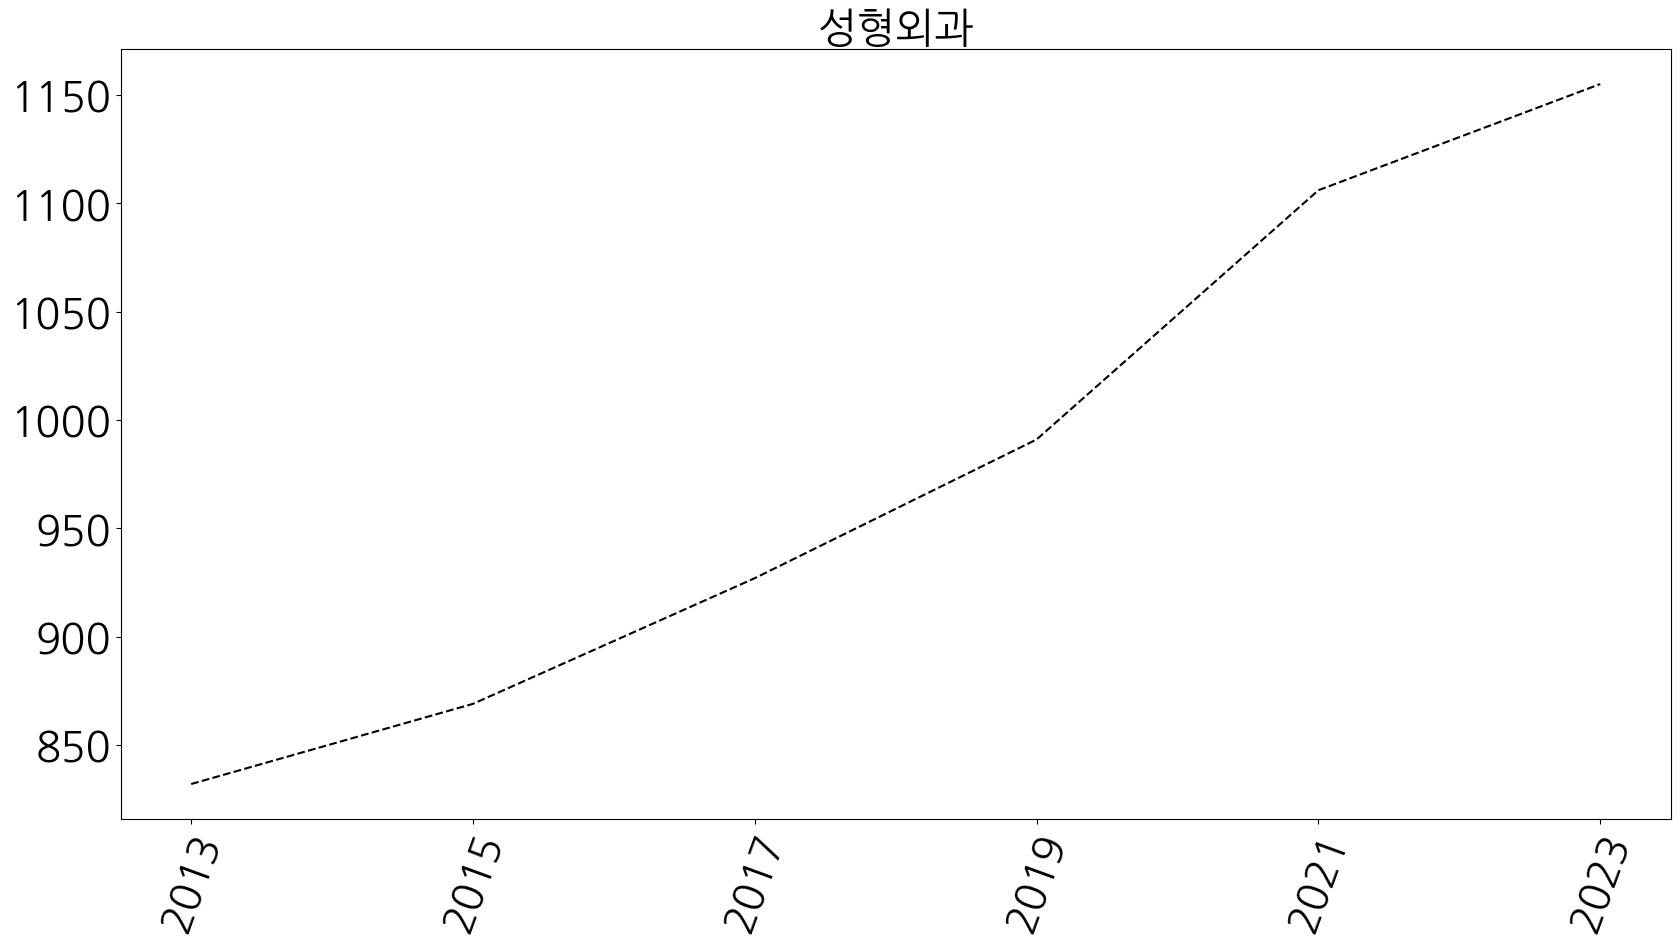

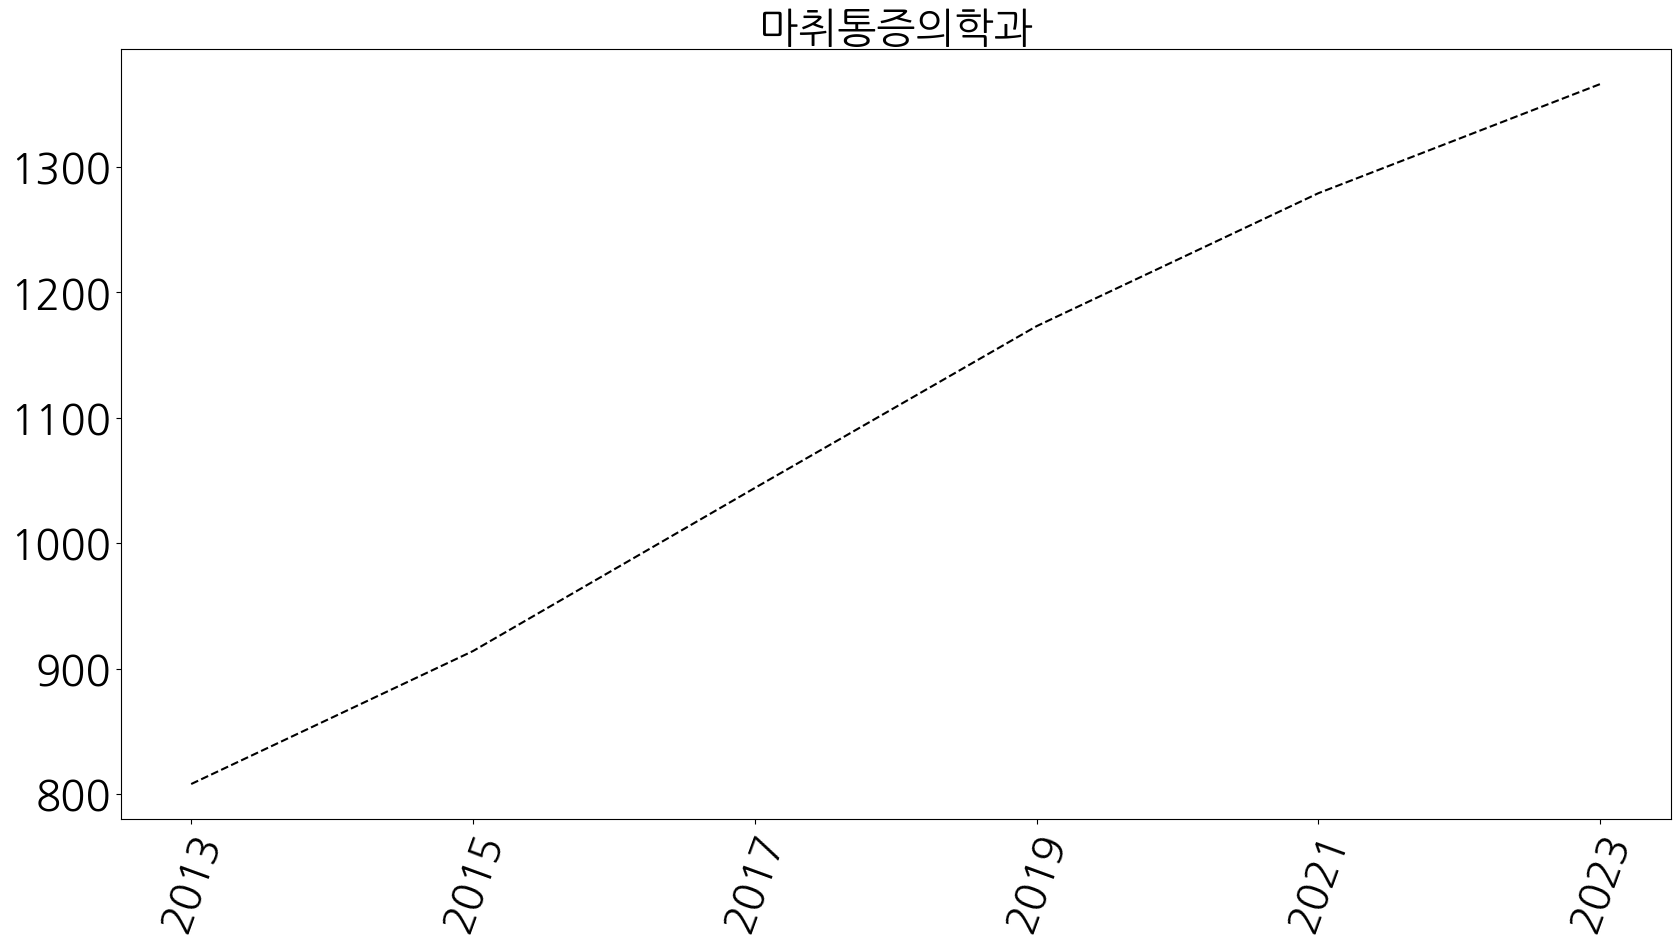

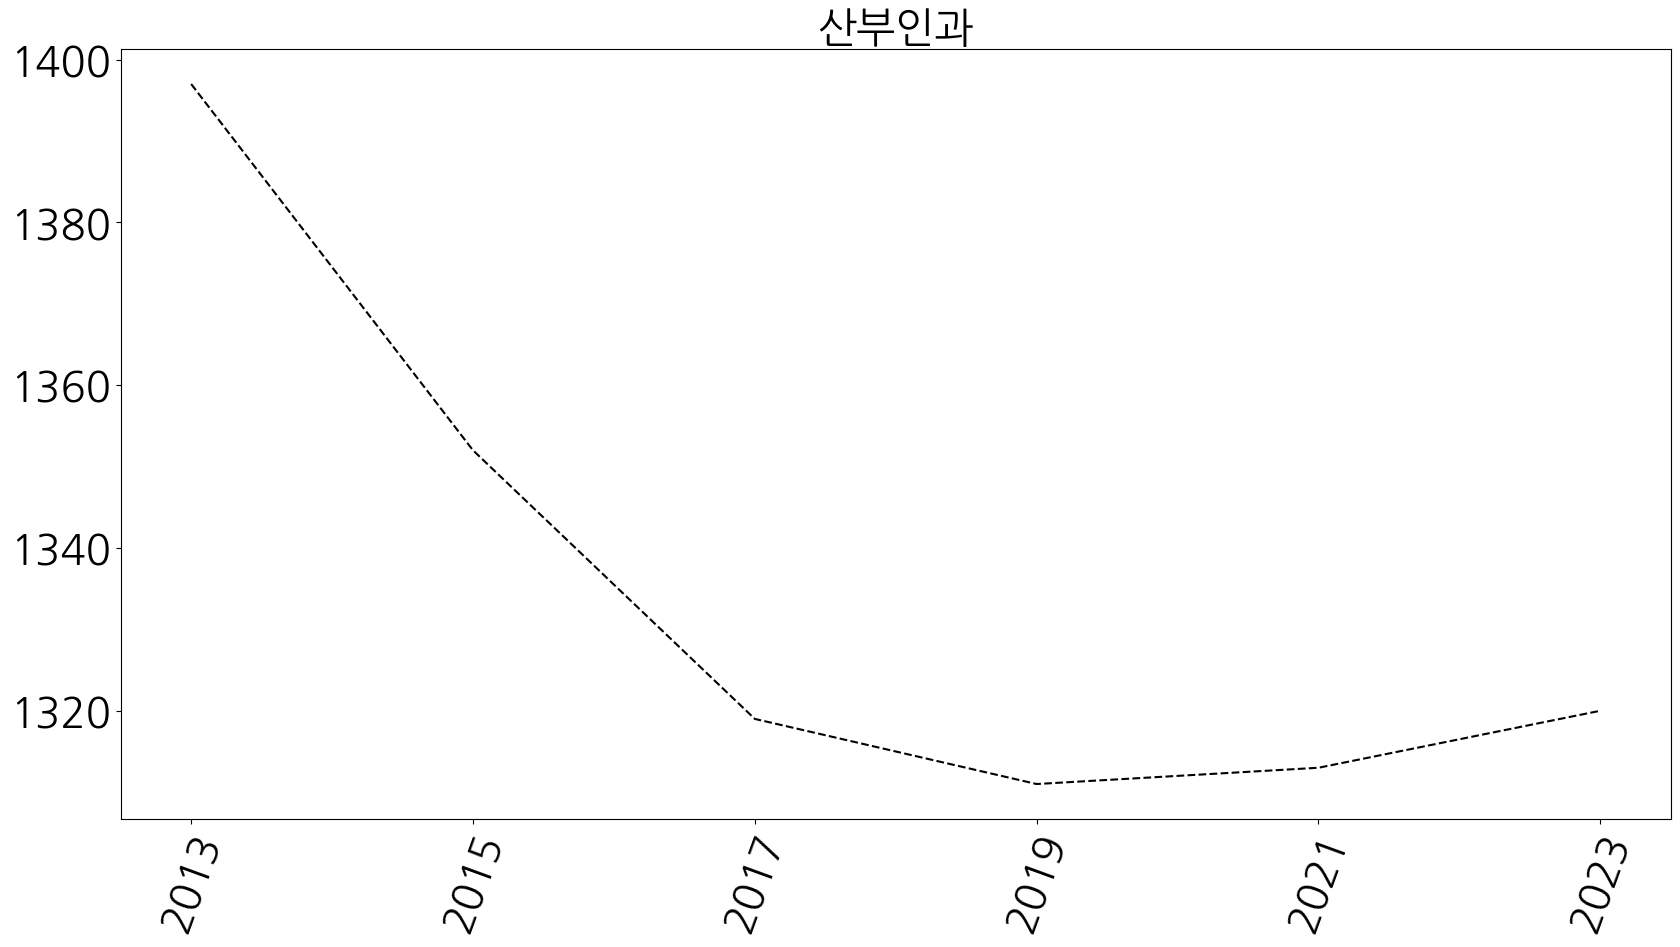

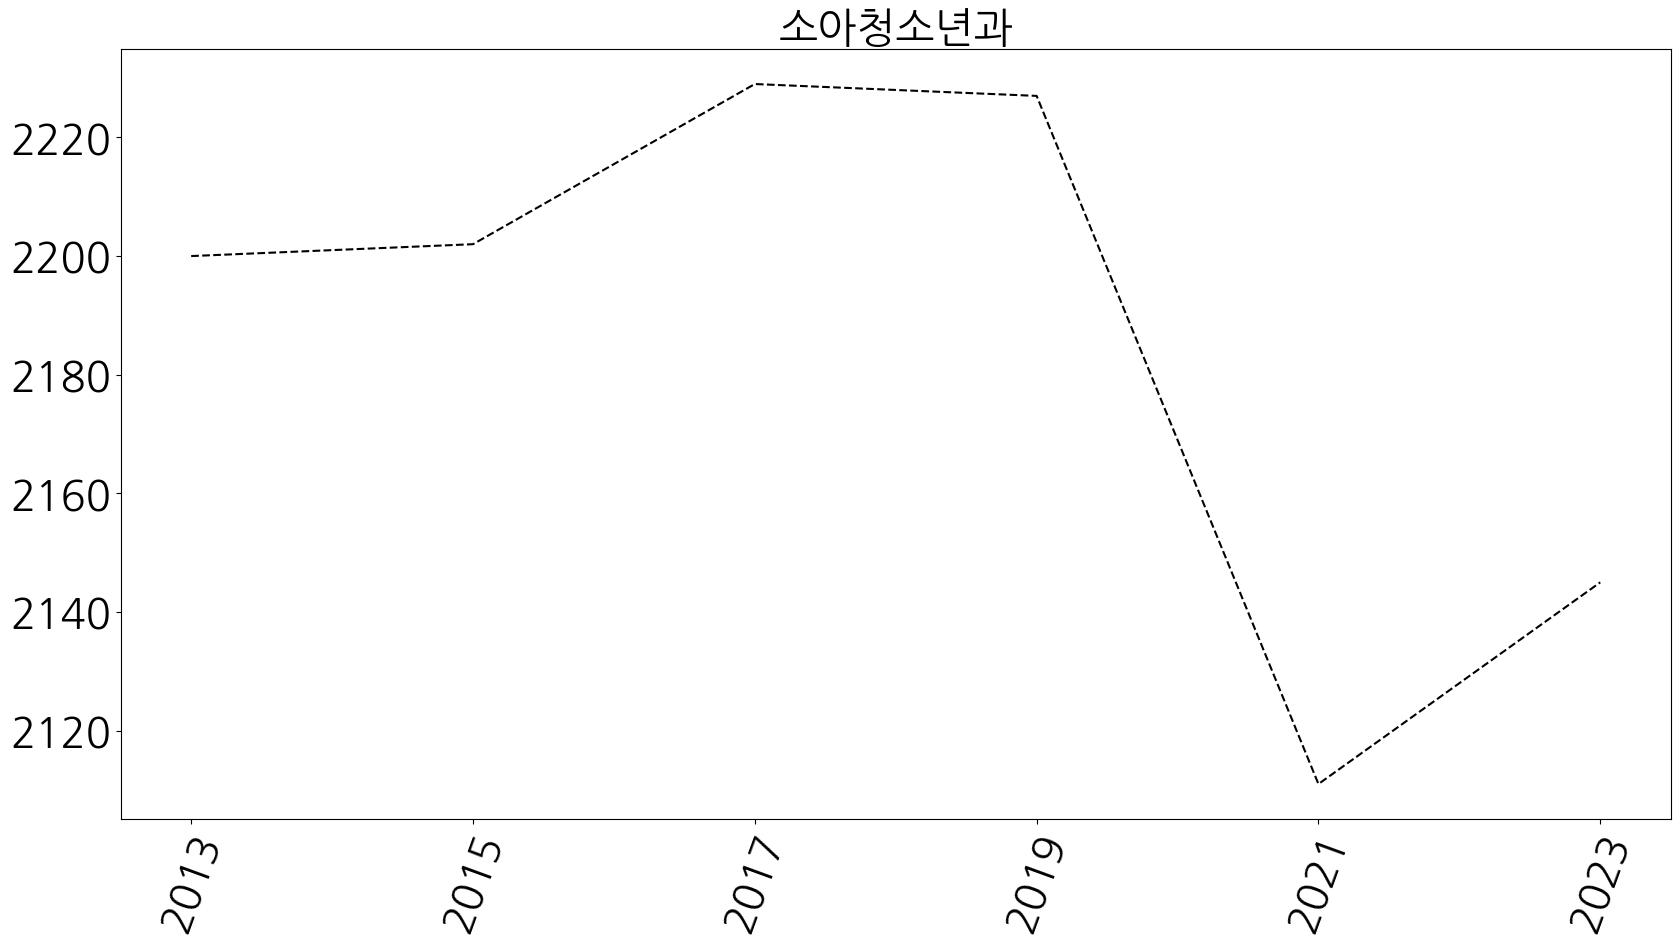

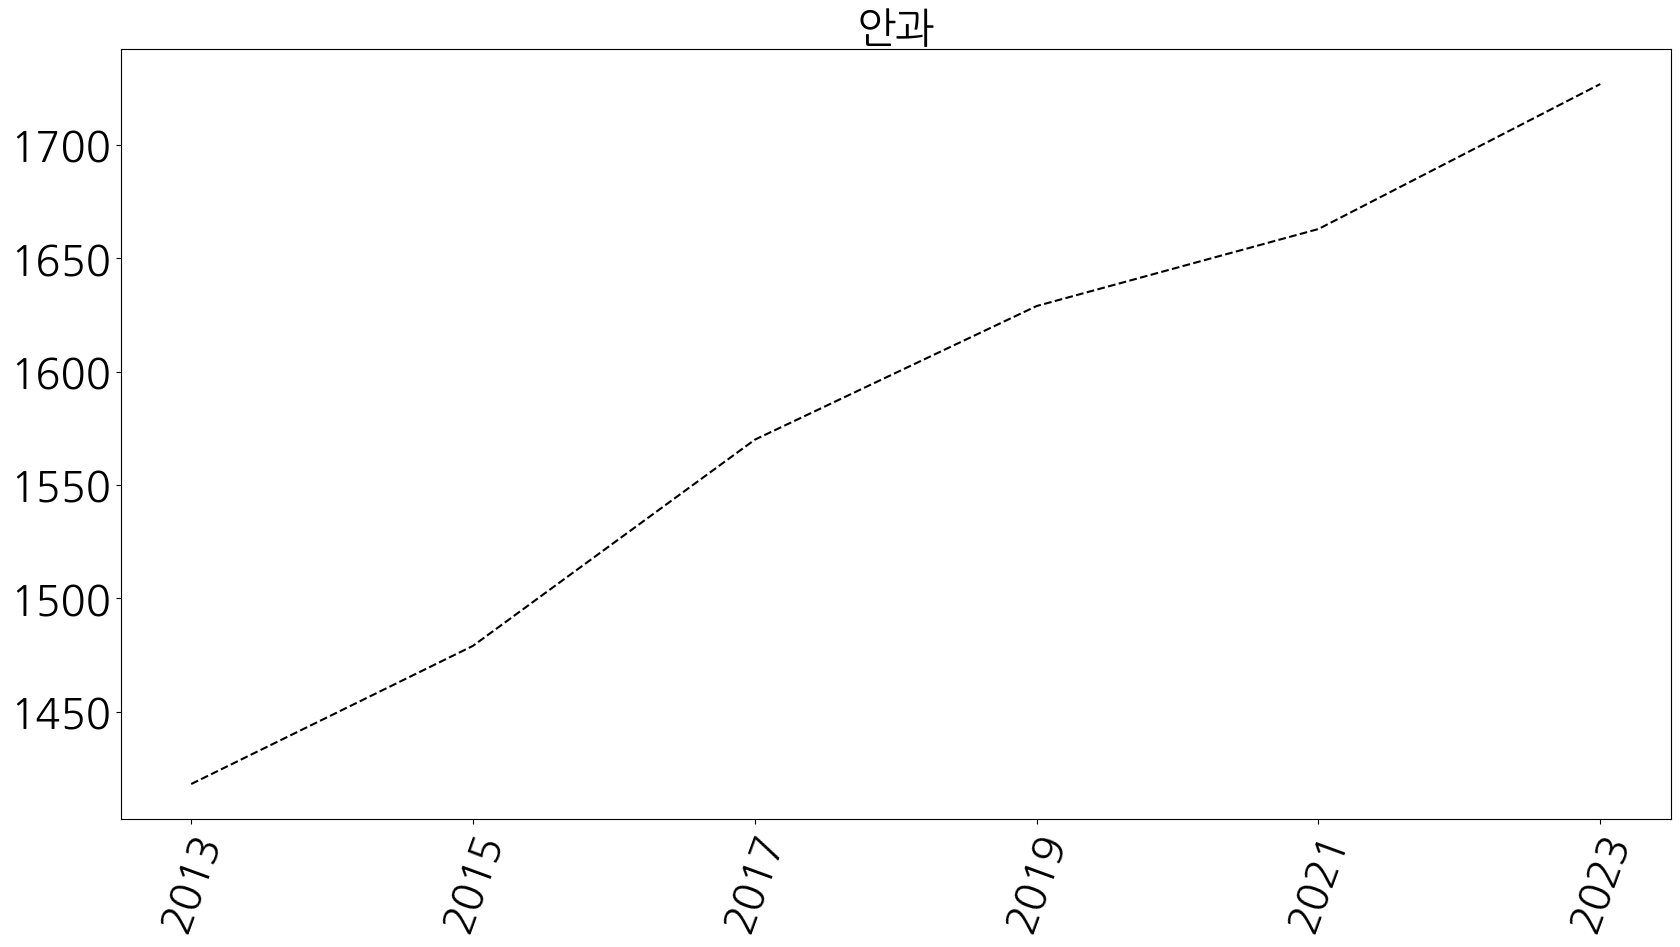

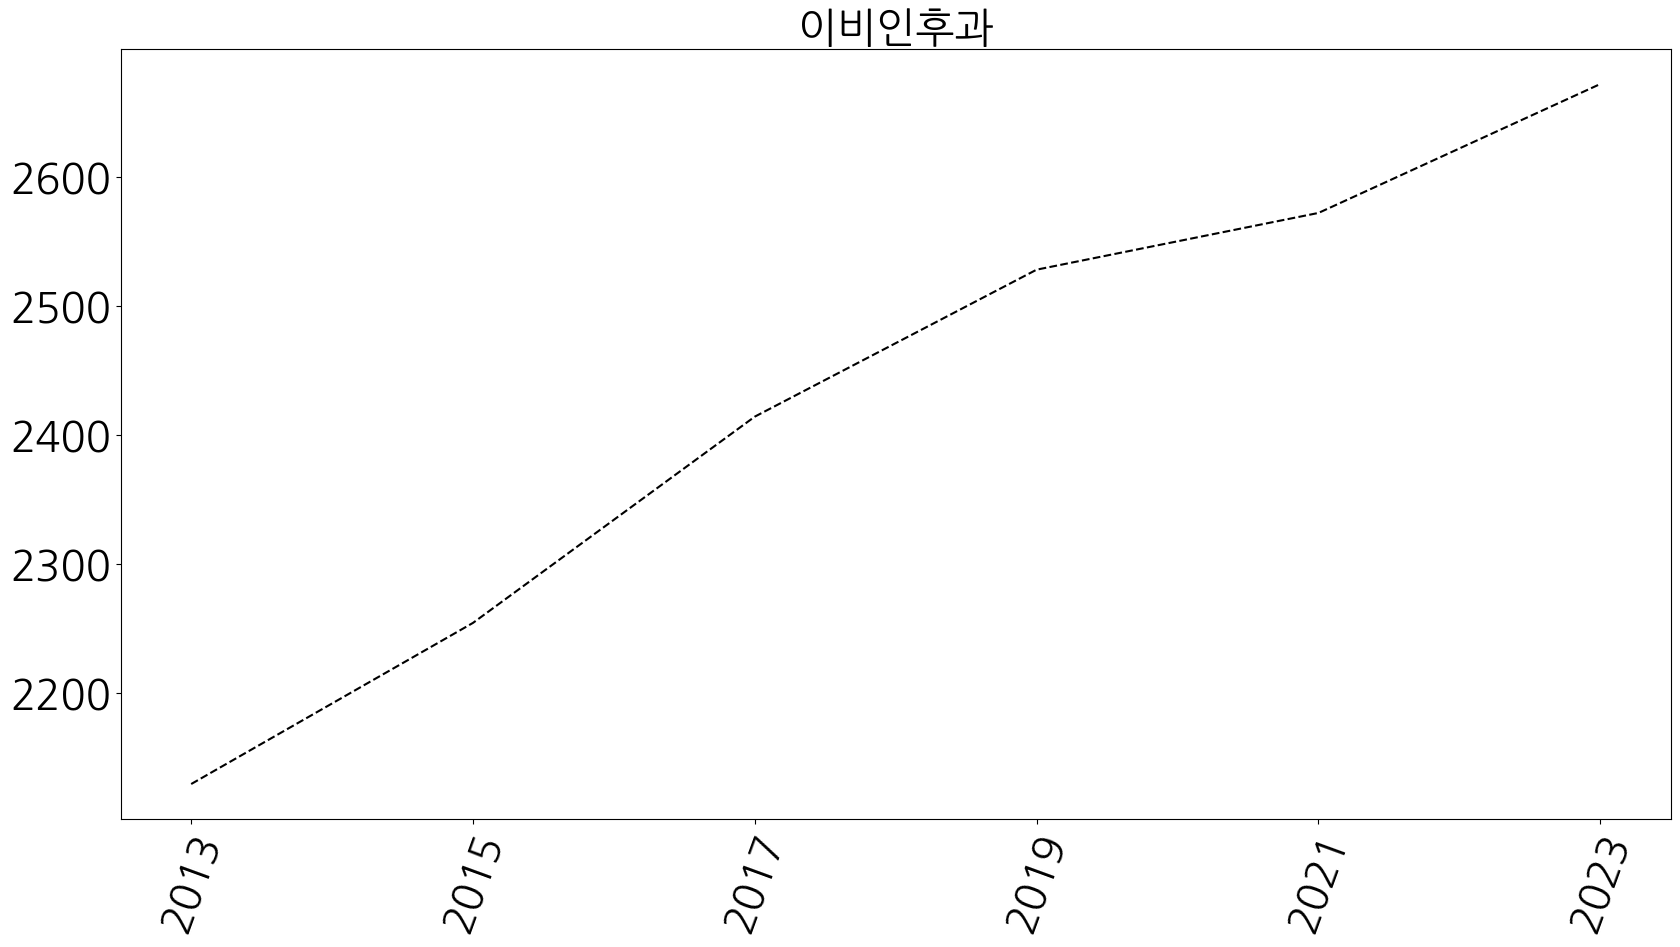

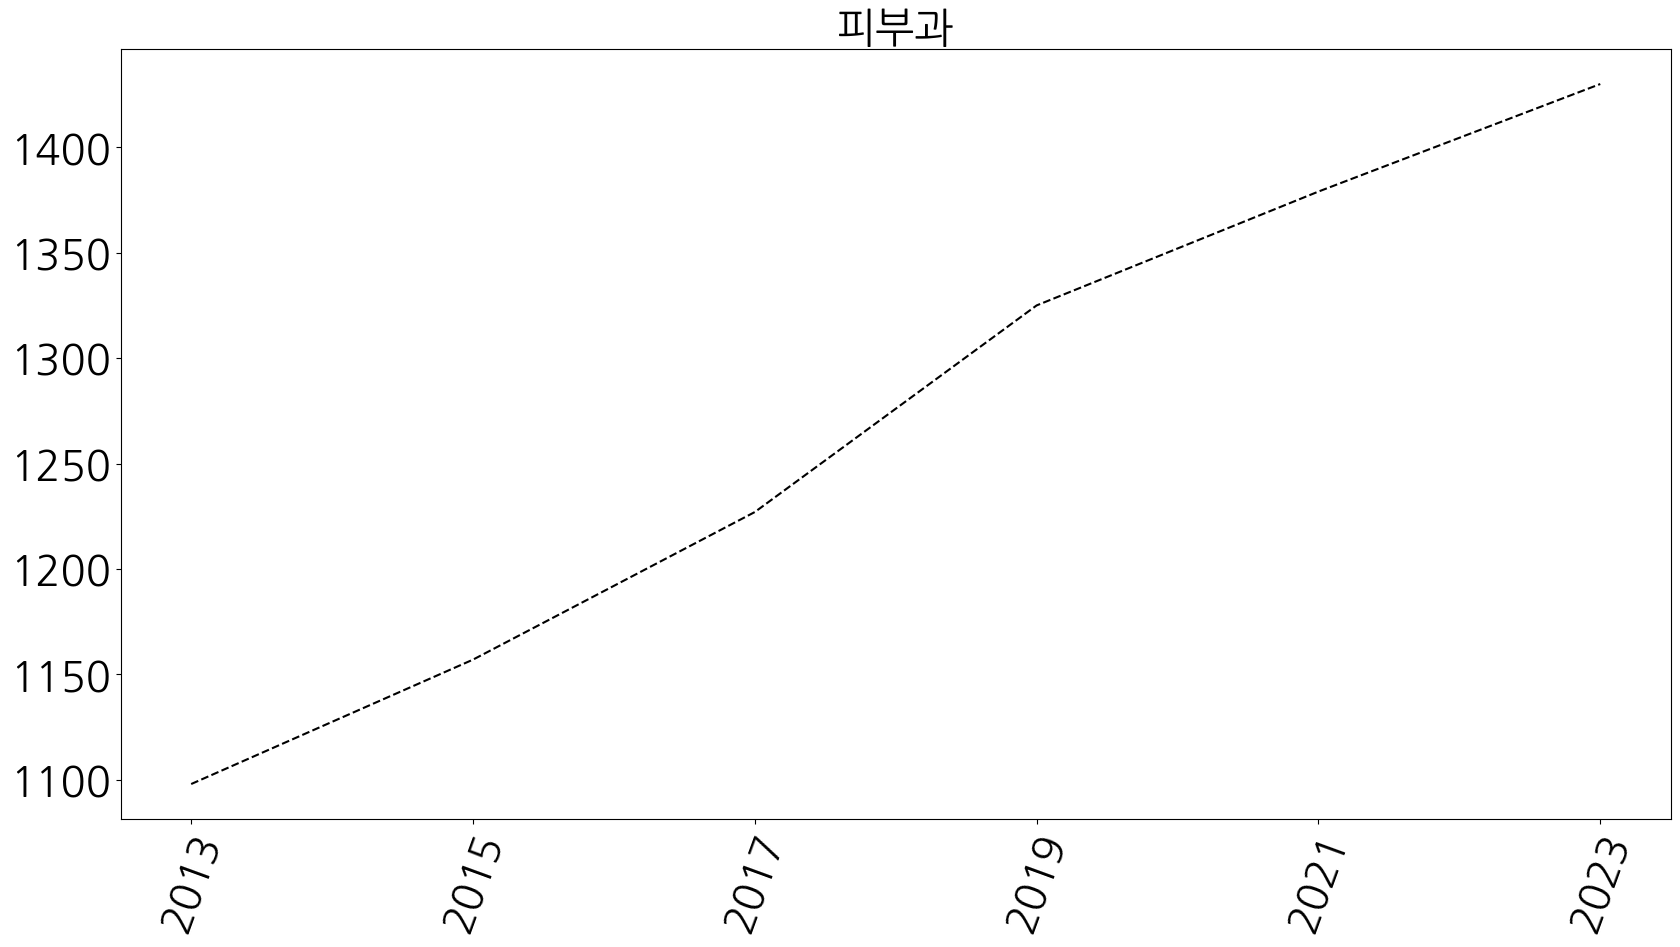

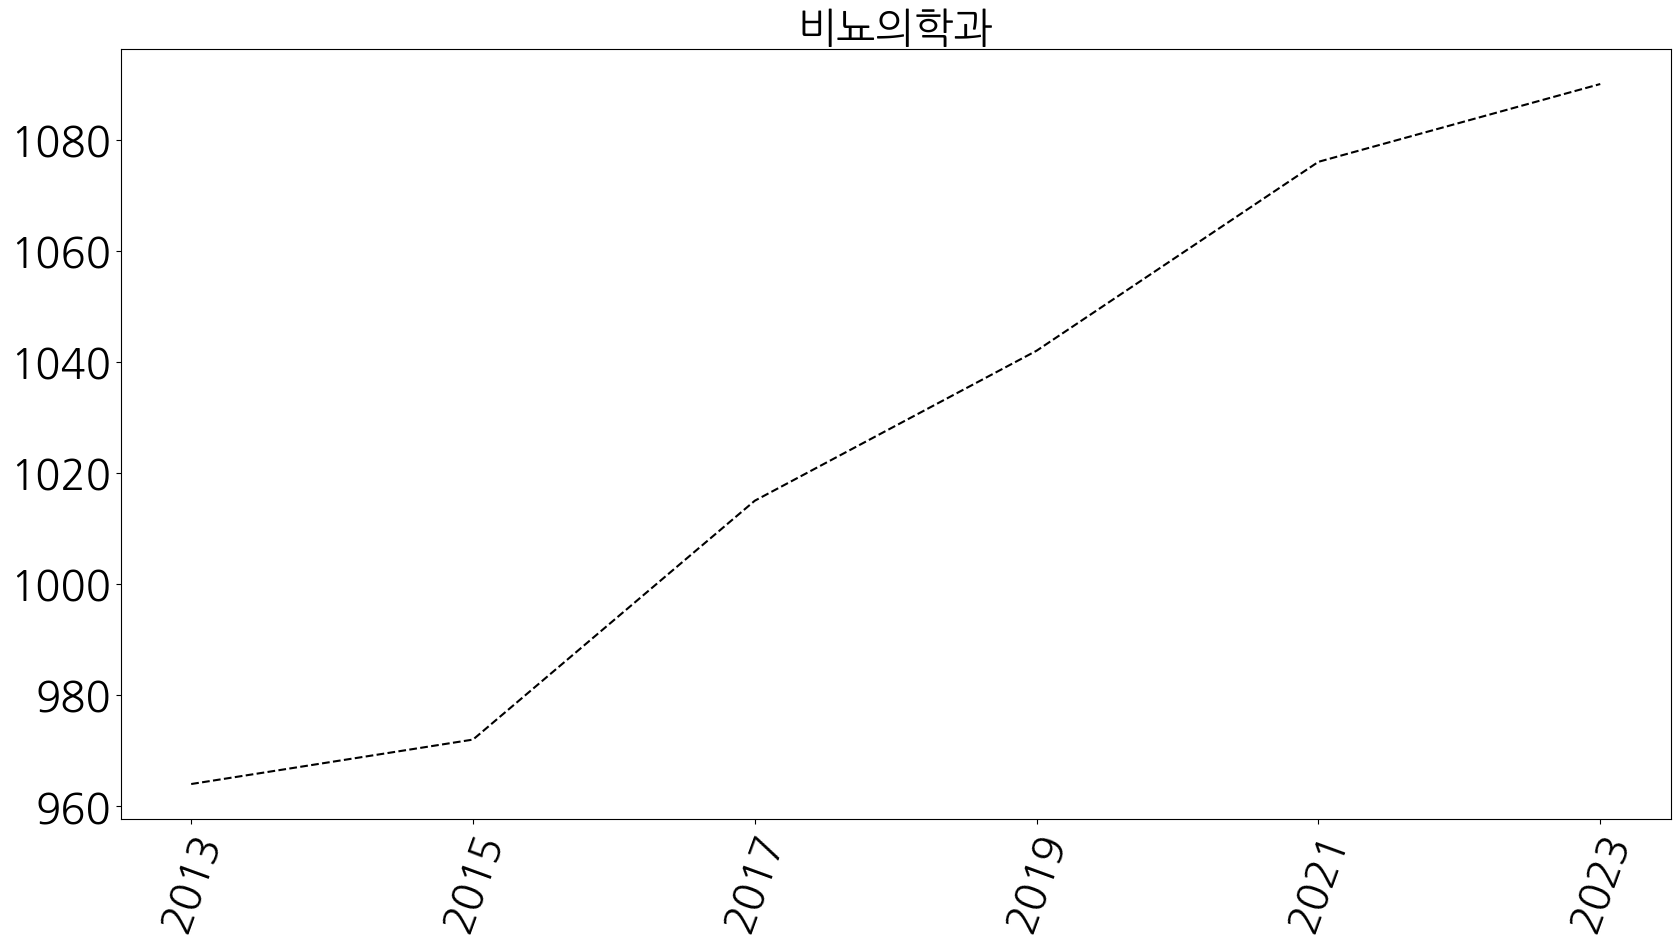

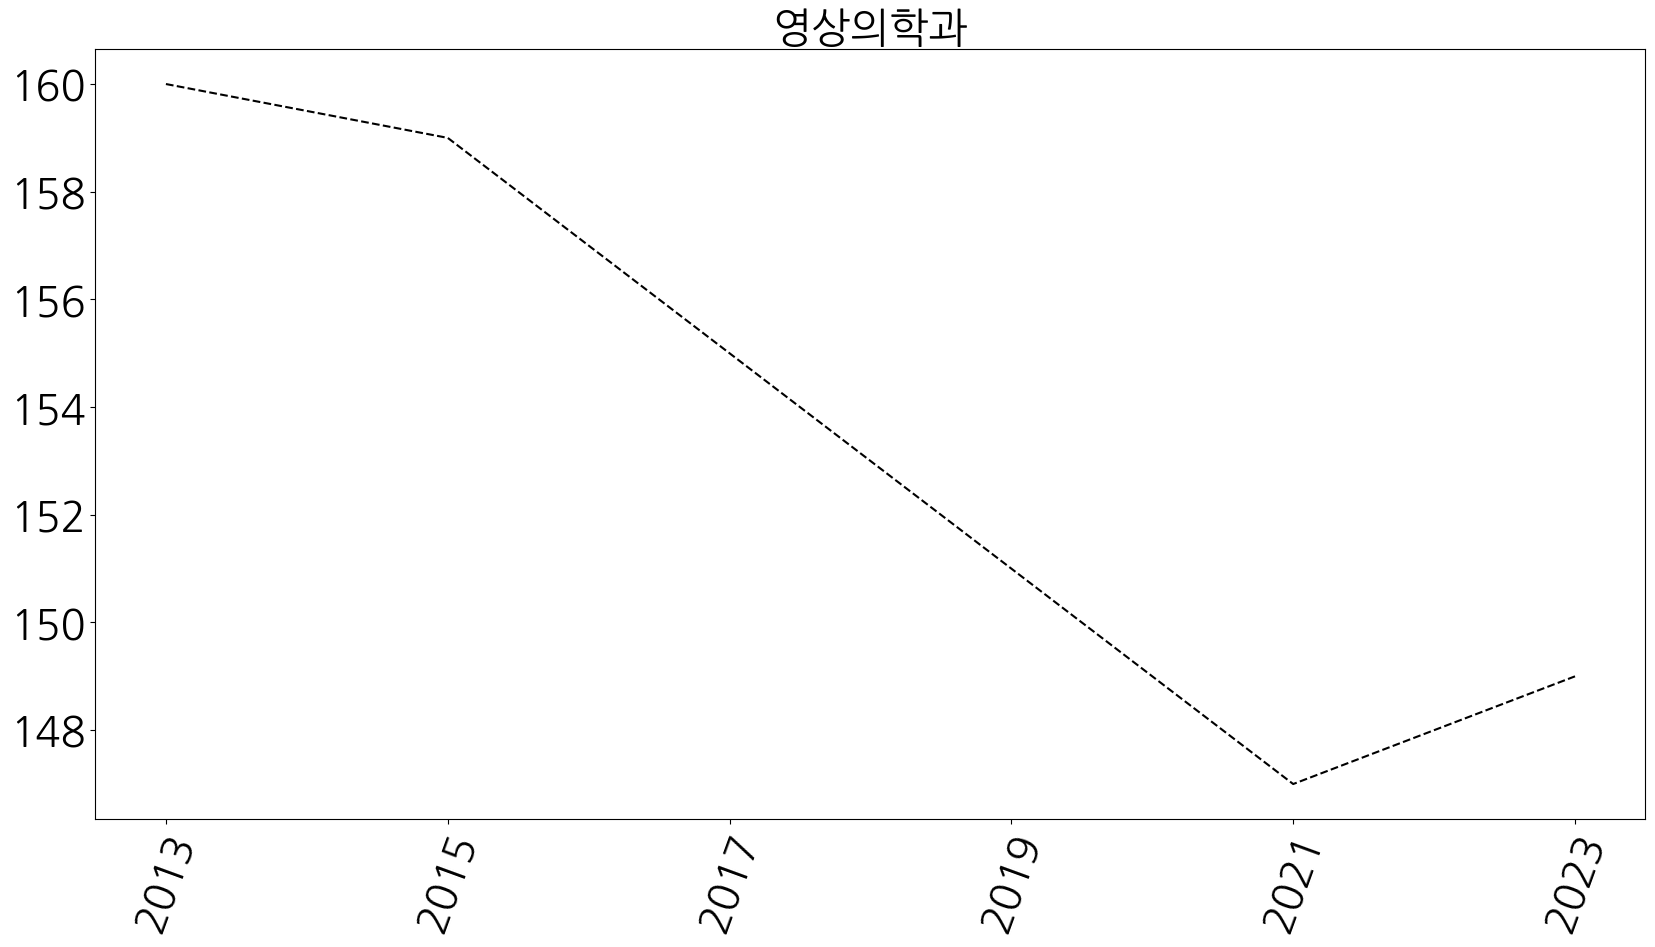

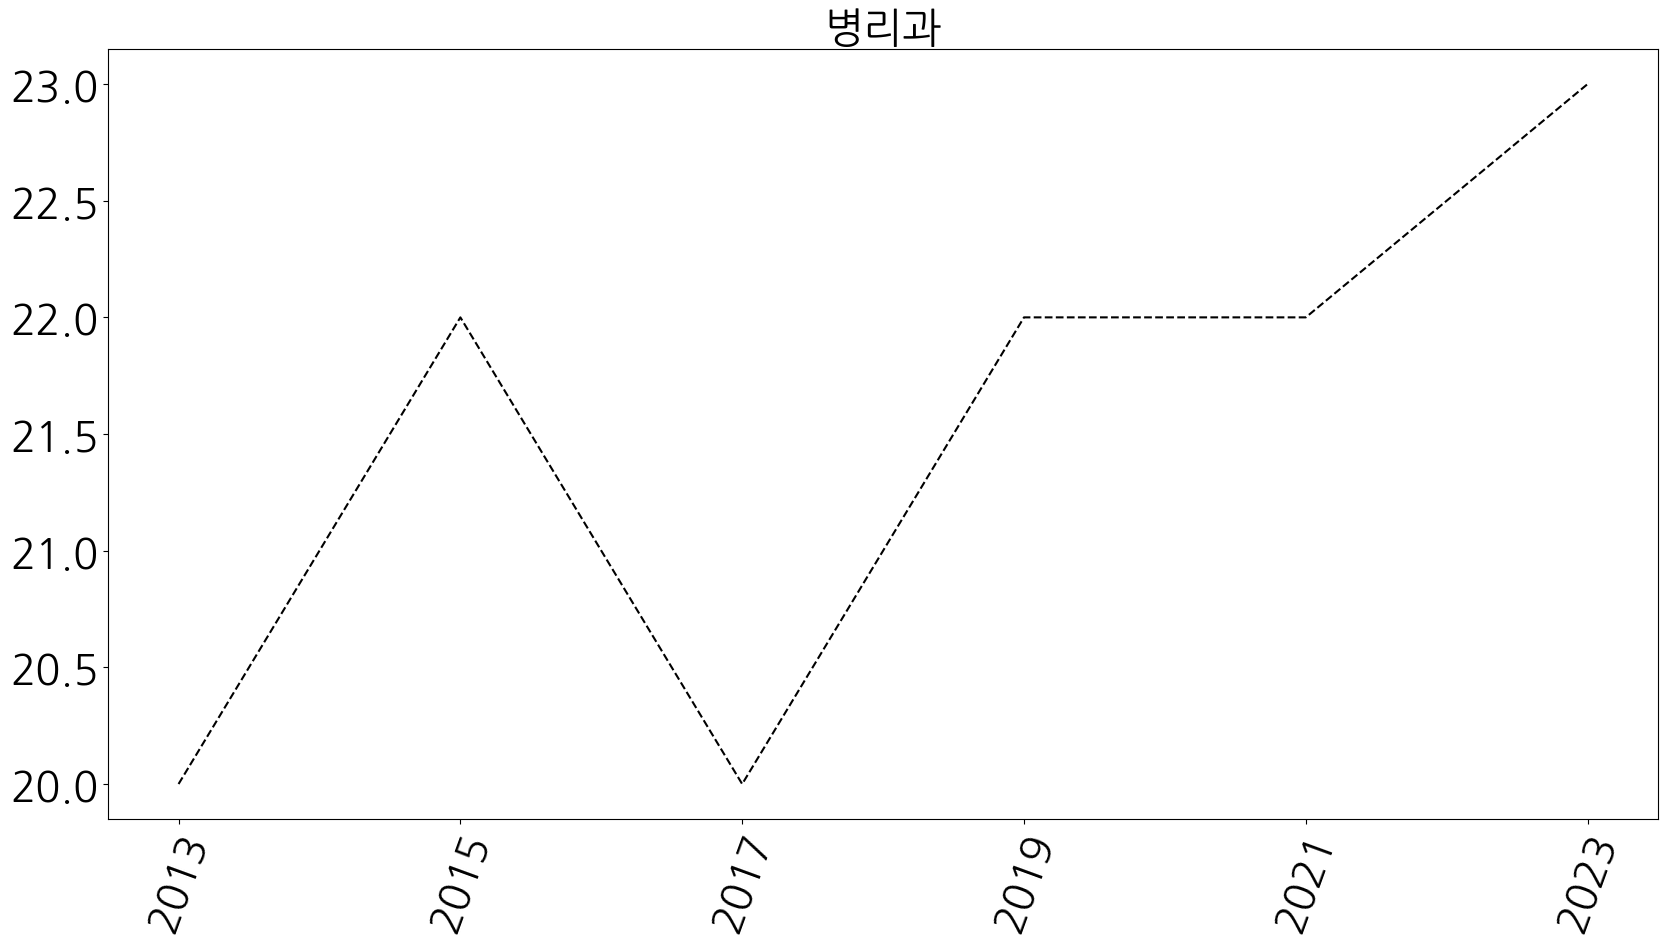

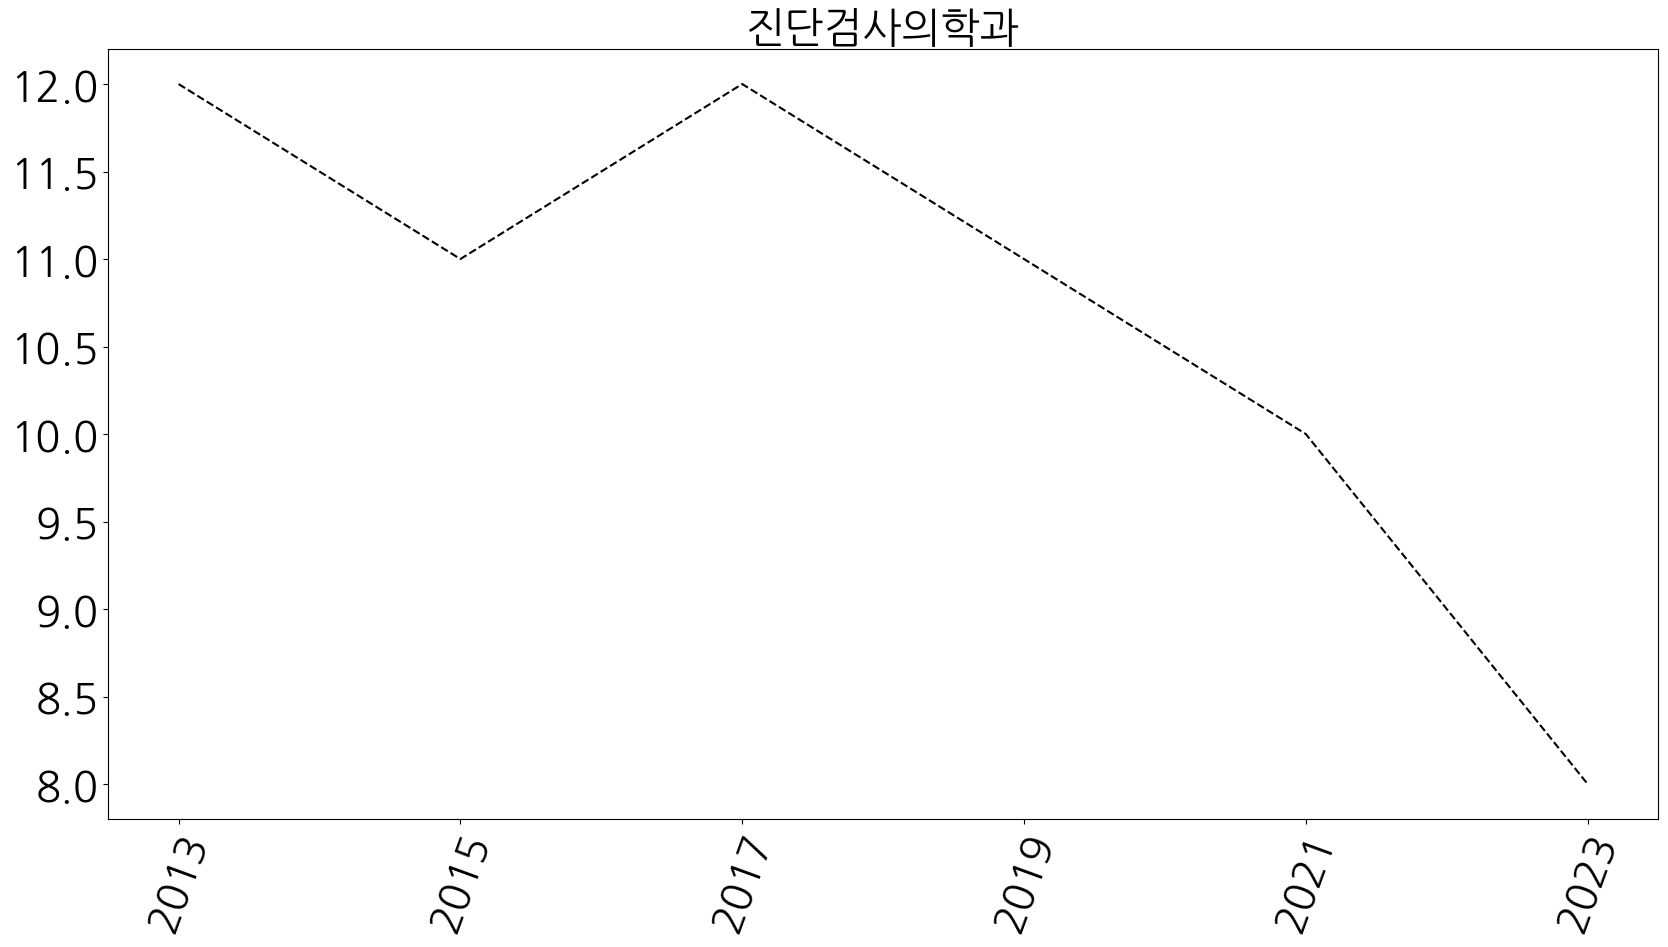

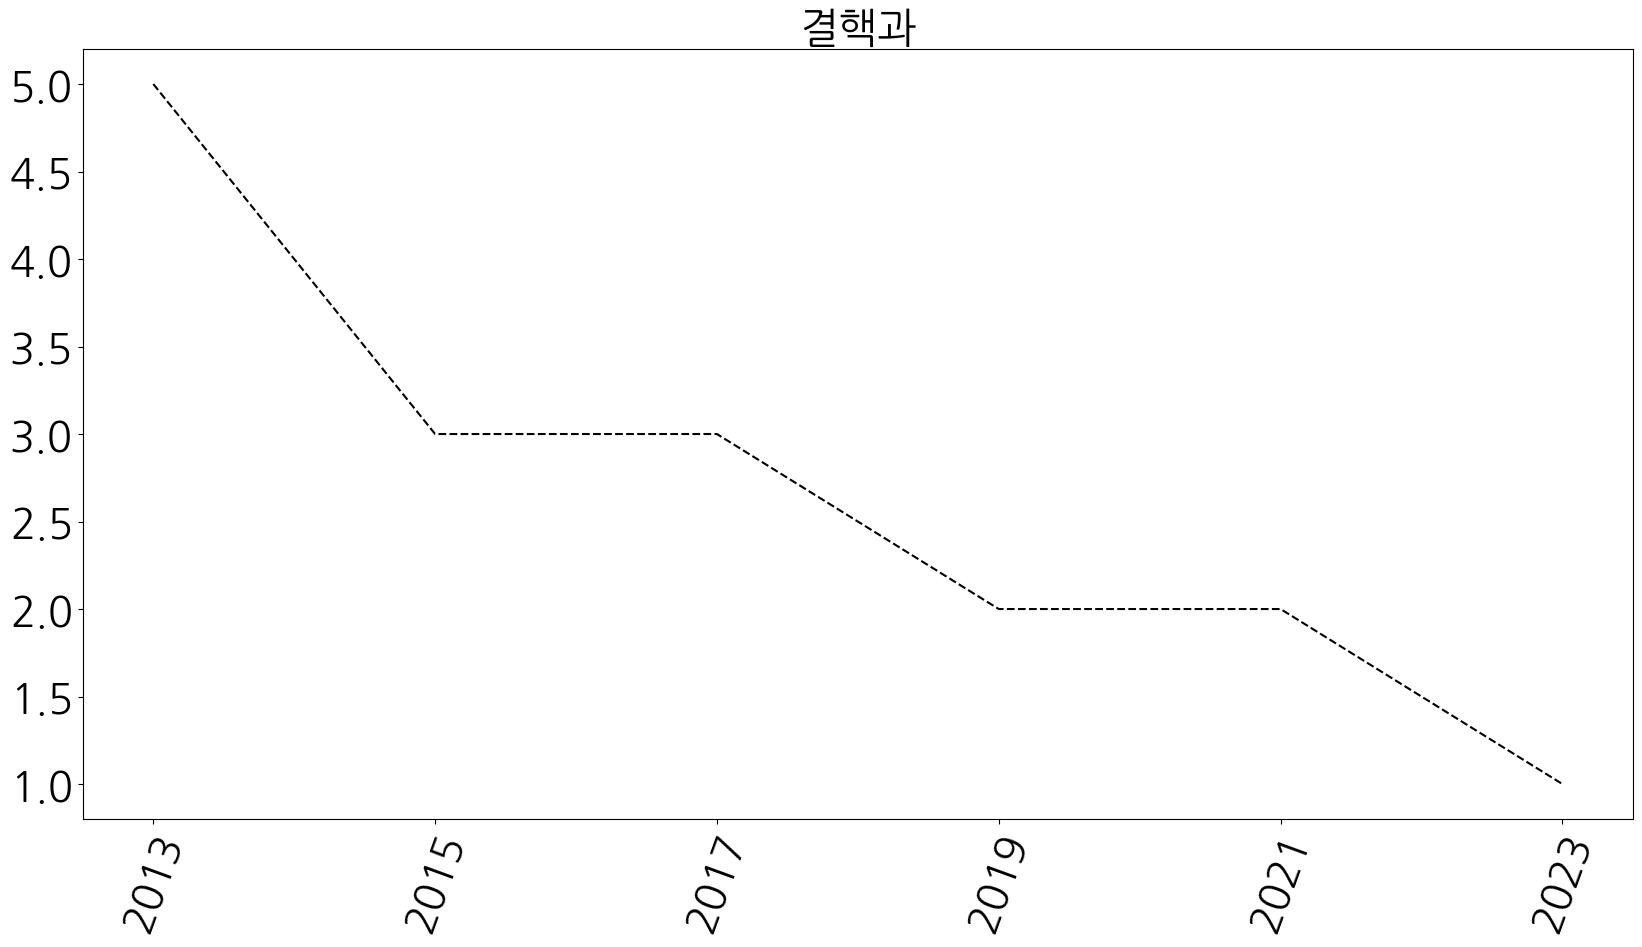

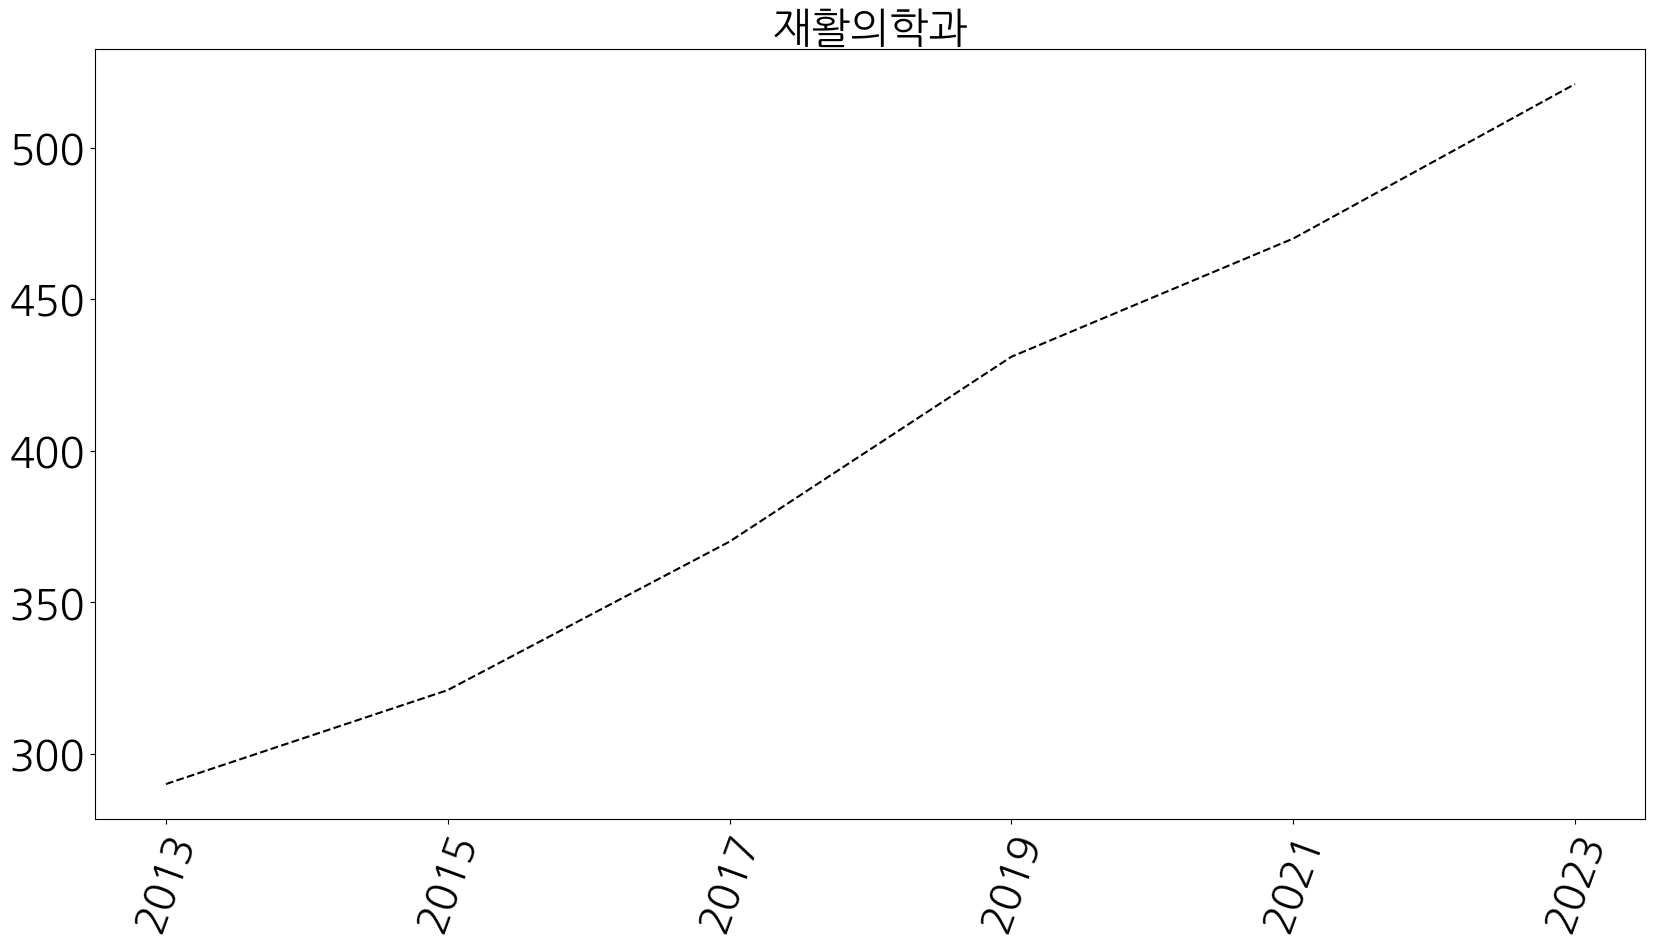

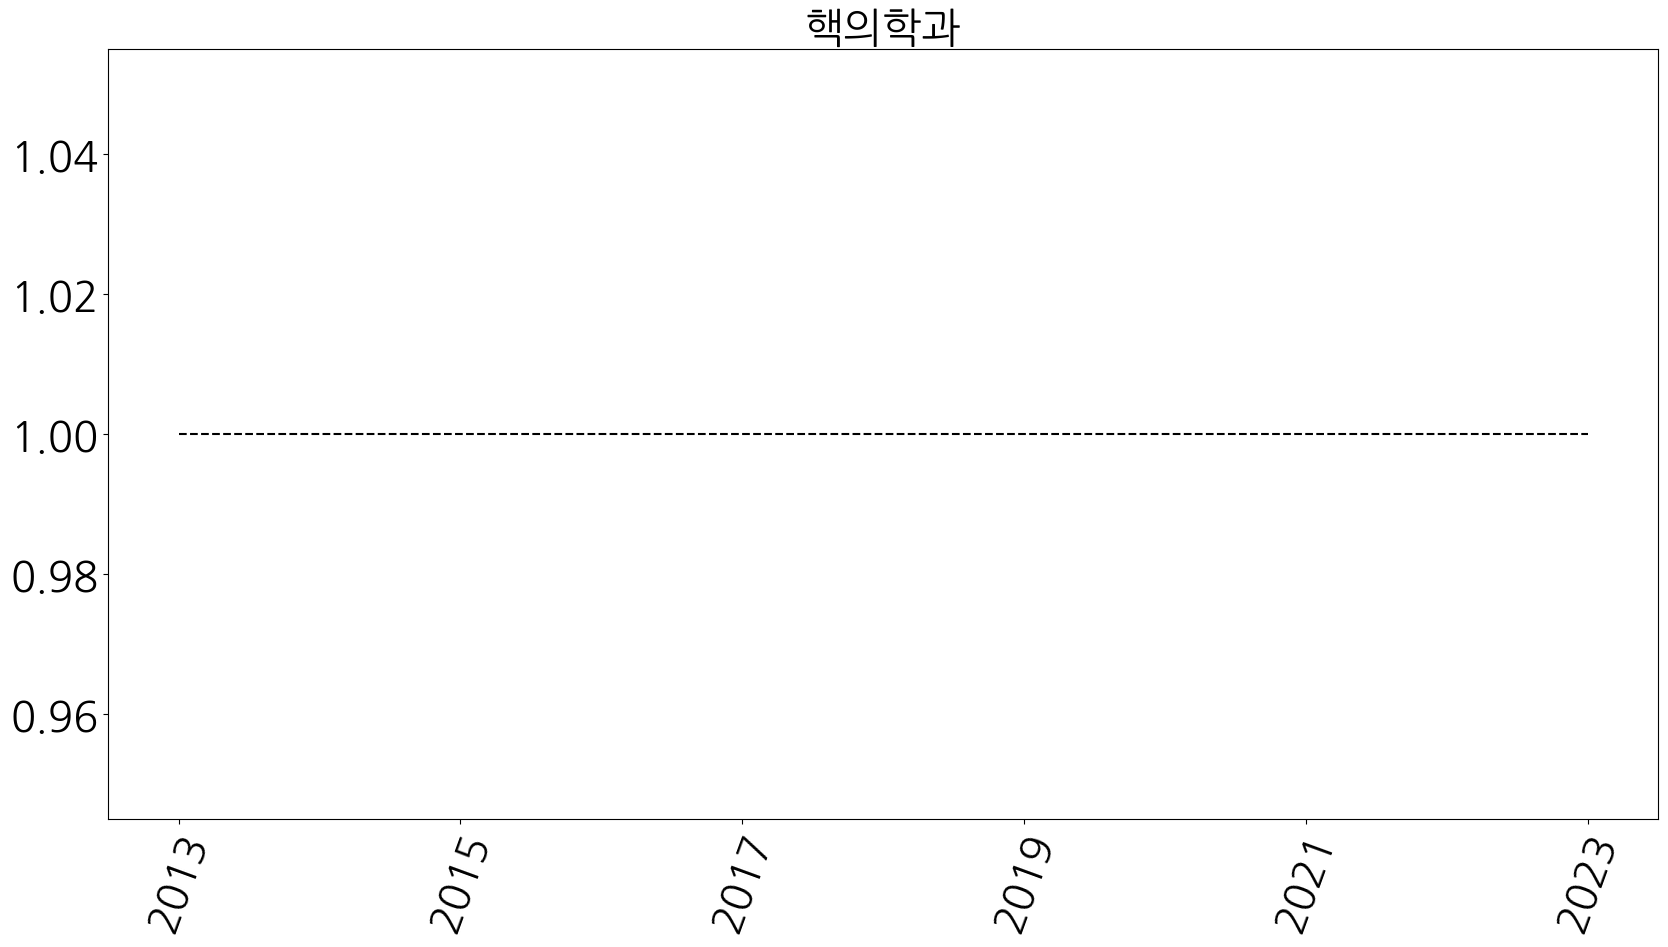

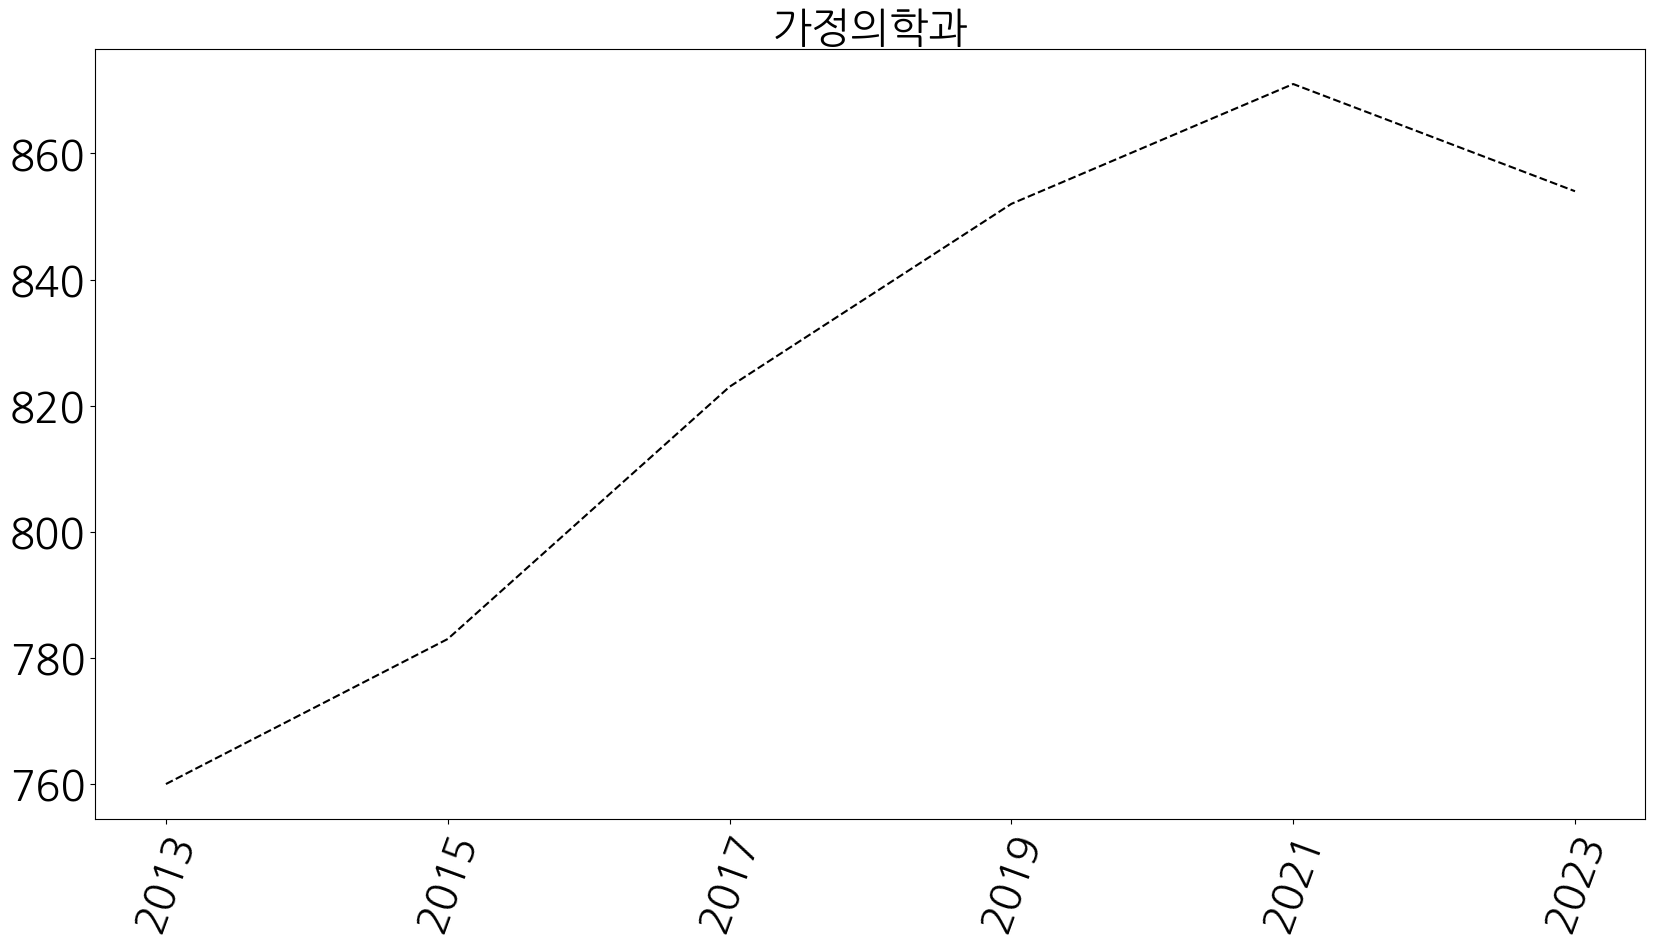

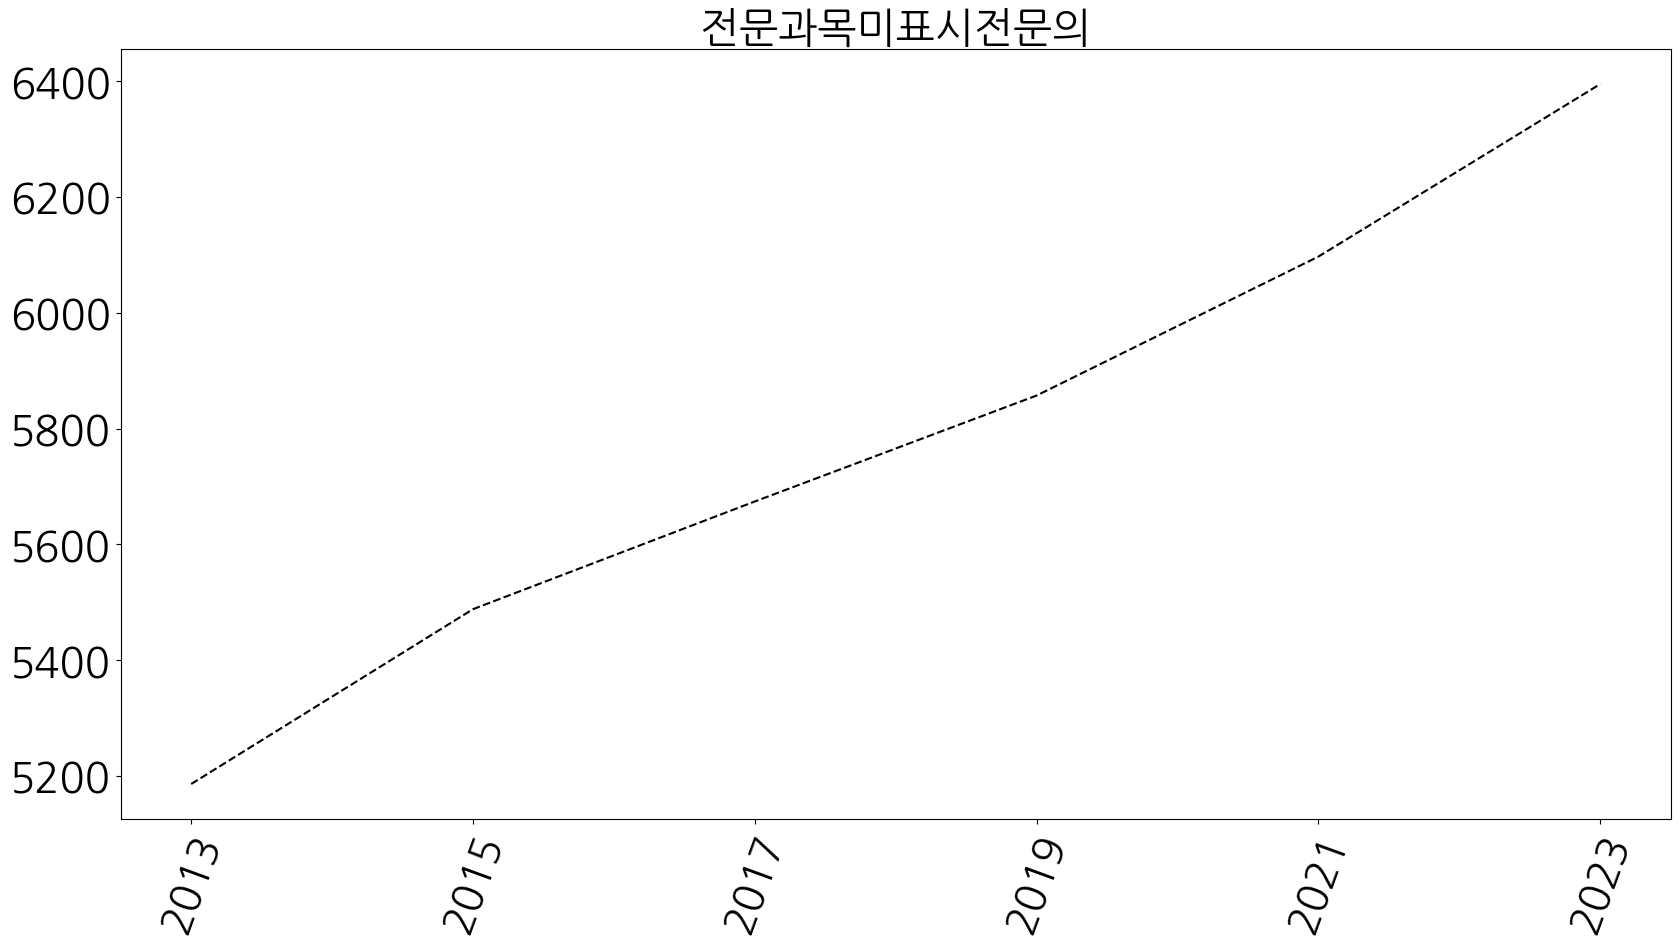

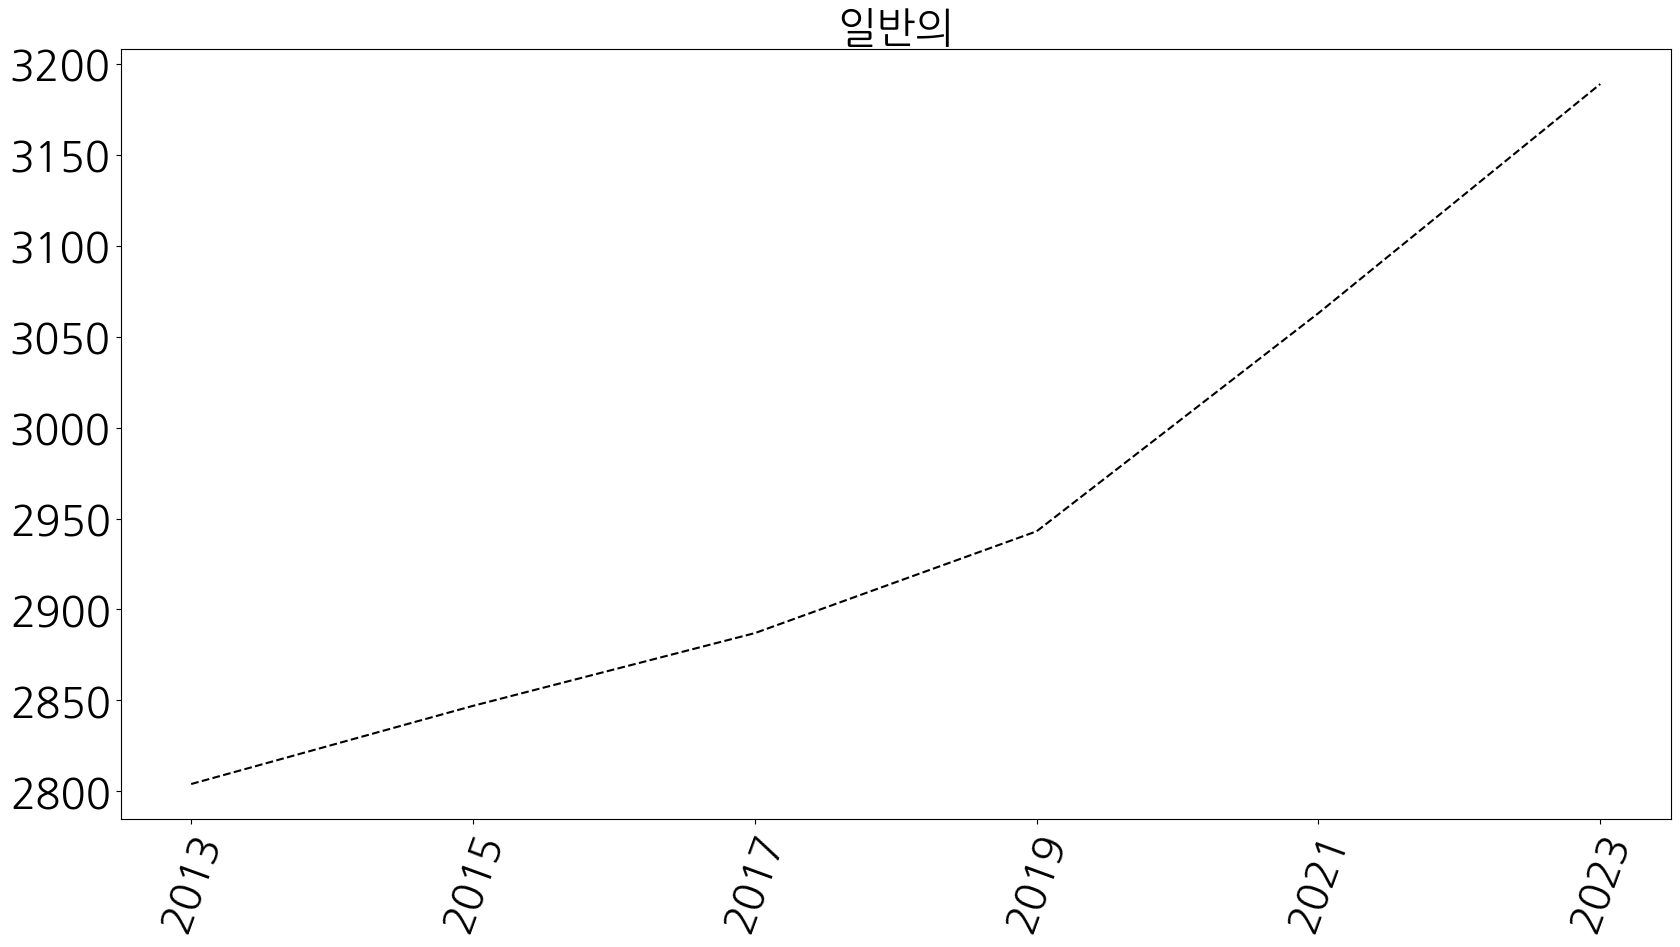

In [85]:
for i in range(len(df_list)):
    draw_graph(df_list[i], name_list[i])

# <hr> multi bar

In [171]:
def draw_graph2(df, name):
    plt.figure(figsize=(15, 7))
    # x = group_area.index.to_list()
    x = ["2013", "2015", "2017", "2019", "2021", "2023"]
    y = df.iloc[0].to_list()
    # 'gold', 'b', '#FF0000', 'green'
    # df_list[0].loc[["서울특별시", "부산광역시", "대구광역시", "경기도"]]
    # 서울 경기 부산 대구 
    sum = 0
    p1 = plt.bar(x, df.loc["대구광역시"], color='yellowgreen', label = "대구광역시")
    sum += df.loc["대구광역시"]
    p2 = plt.bar(x, df.loc["부산광역시"], color='gold', bottom=sum, label = "부산광역시")
    sum += df.loc["부산광역시"]
    p3 = plt.bar(x, df.loc["경기도"], color='cornflowerblue', bottom=sum, label = "경기도")
    sum += df.loc["경기도"]
    p4 = plt.bar(x, df.loc["서울특별시"], color='pink' ,bottom=sum, label = "서울특별시")
    sum += df.loc["서울특별시"]
    
    # plt.xticks(rotation=70)
    # plt.ylim(220000, 350000)
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    
    plt.title(name, size = 30)
    # 숫자 넣는 부분
    idx = 0
    '''
    for rect in bar:
        height = rect.get_height()
        if idx < 8:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
        else:    
            plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
        idx += 1
    
    plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)
    '''
    plt.xlabel('연도', size = 15)
    plt.ylabel('개', size = 15)
    plt.legend(loc=2, fontsize=15, handles=[p4, p3, p2, p1])
    plt.show()

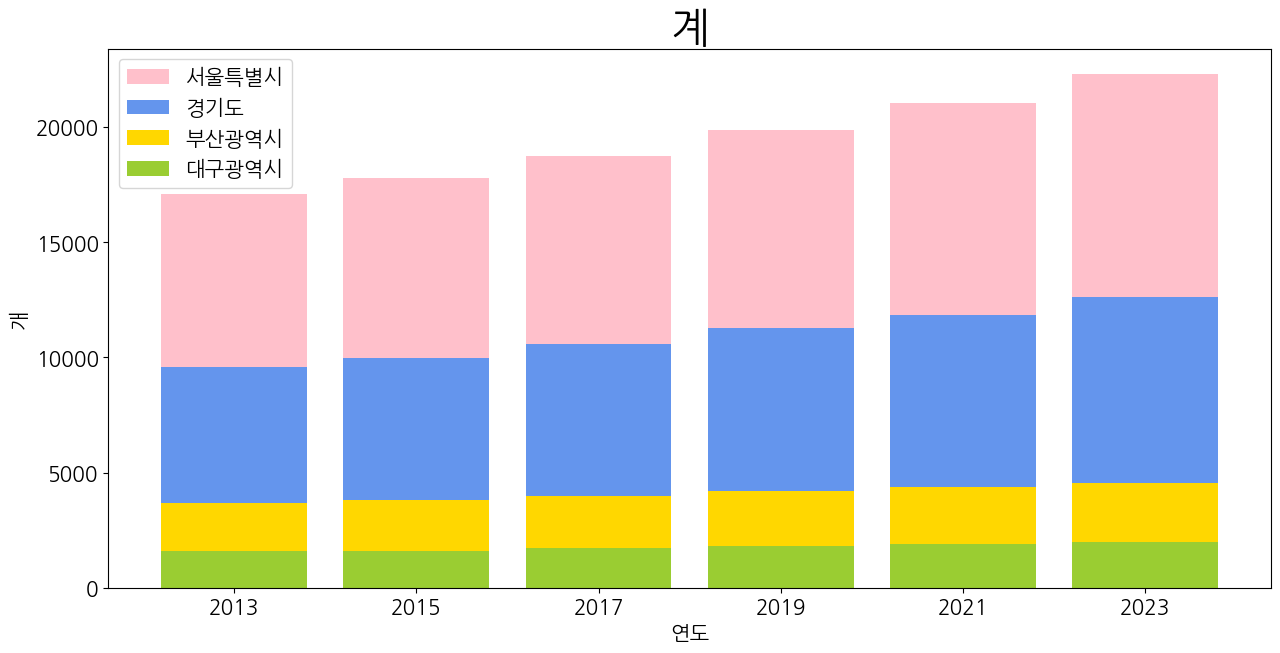

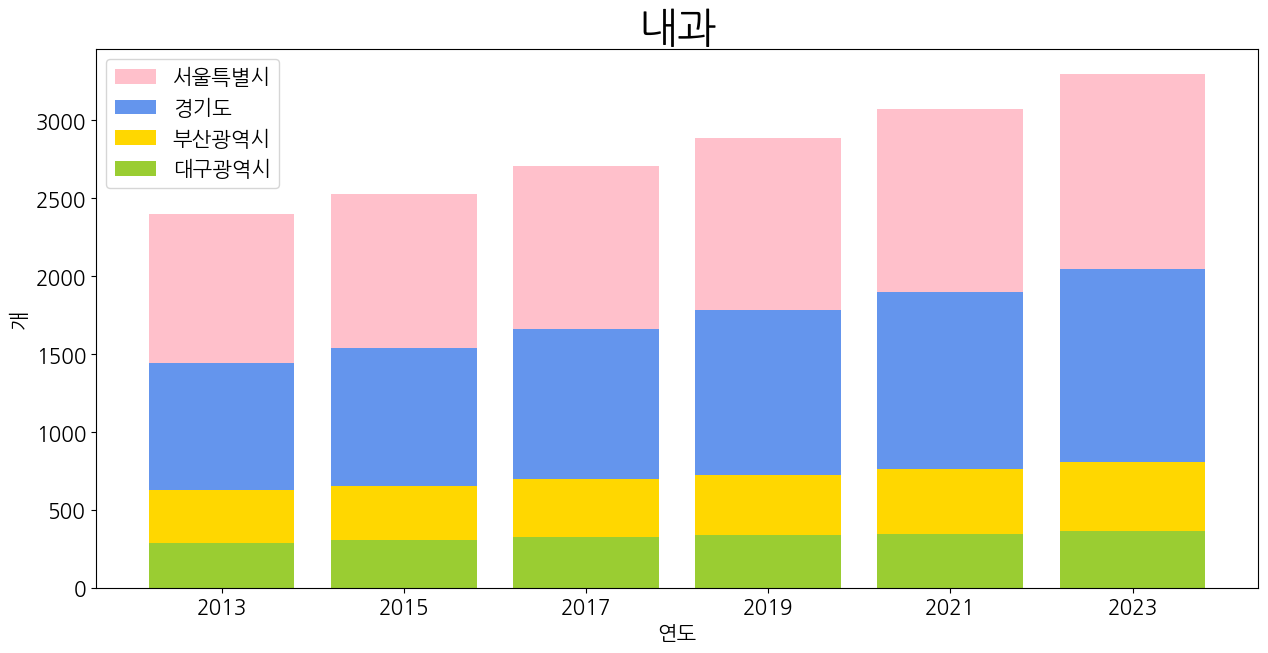

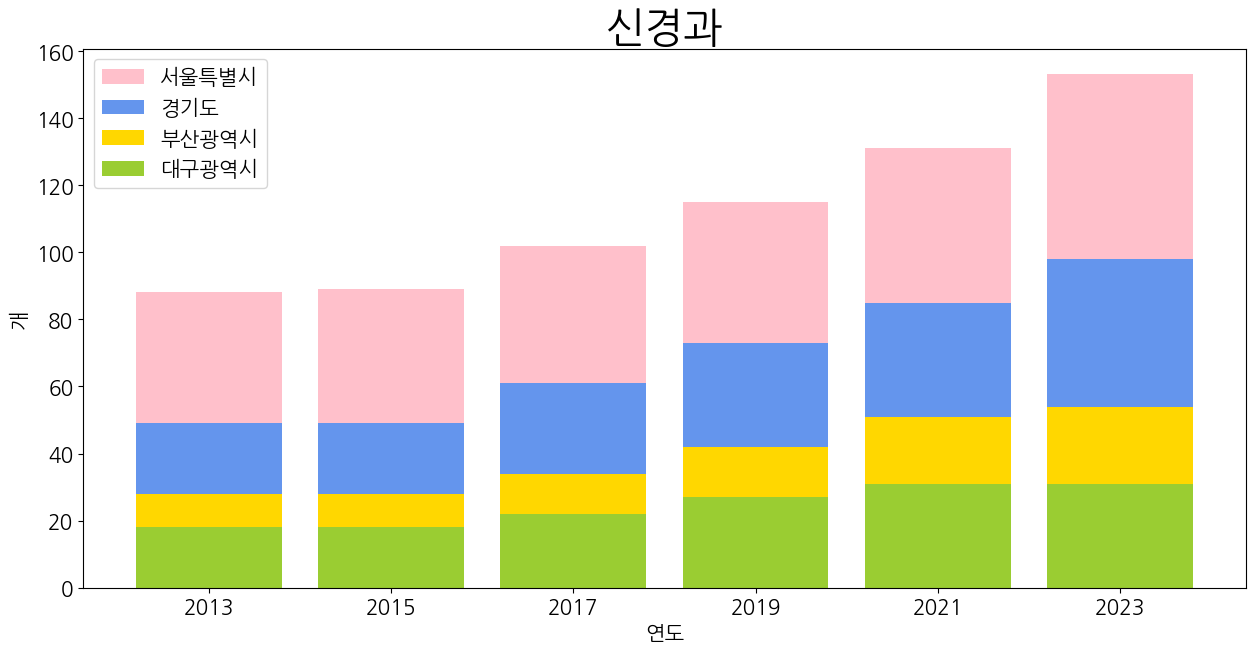

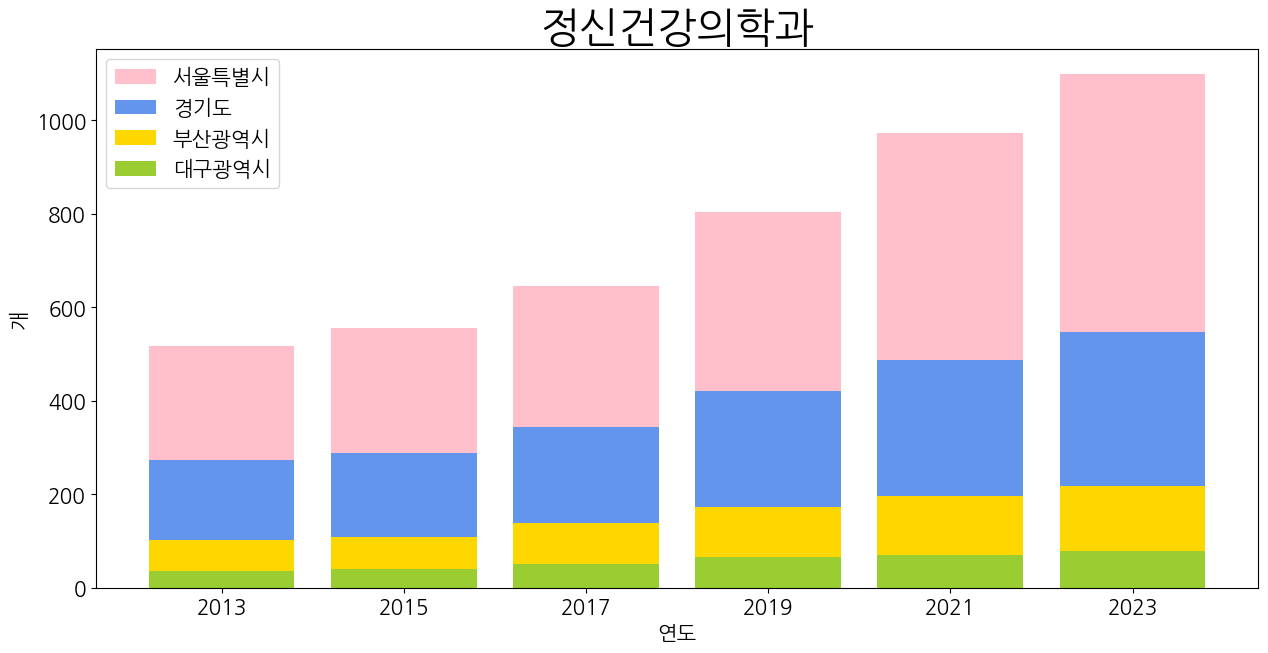

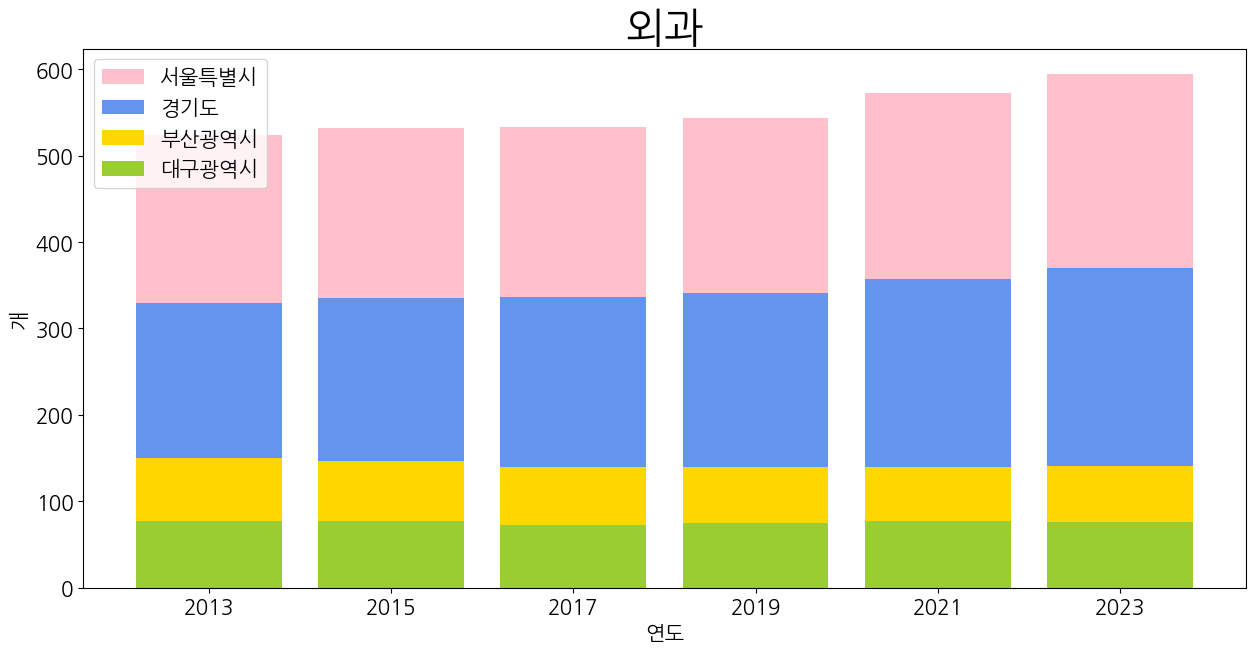

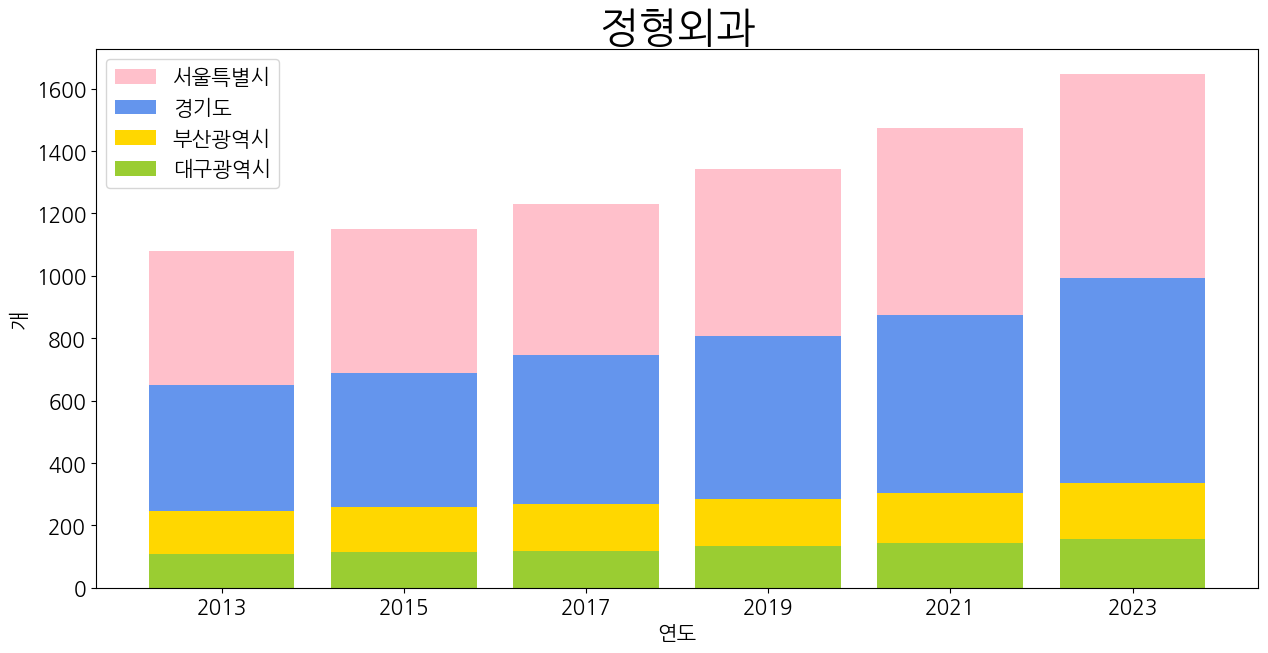

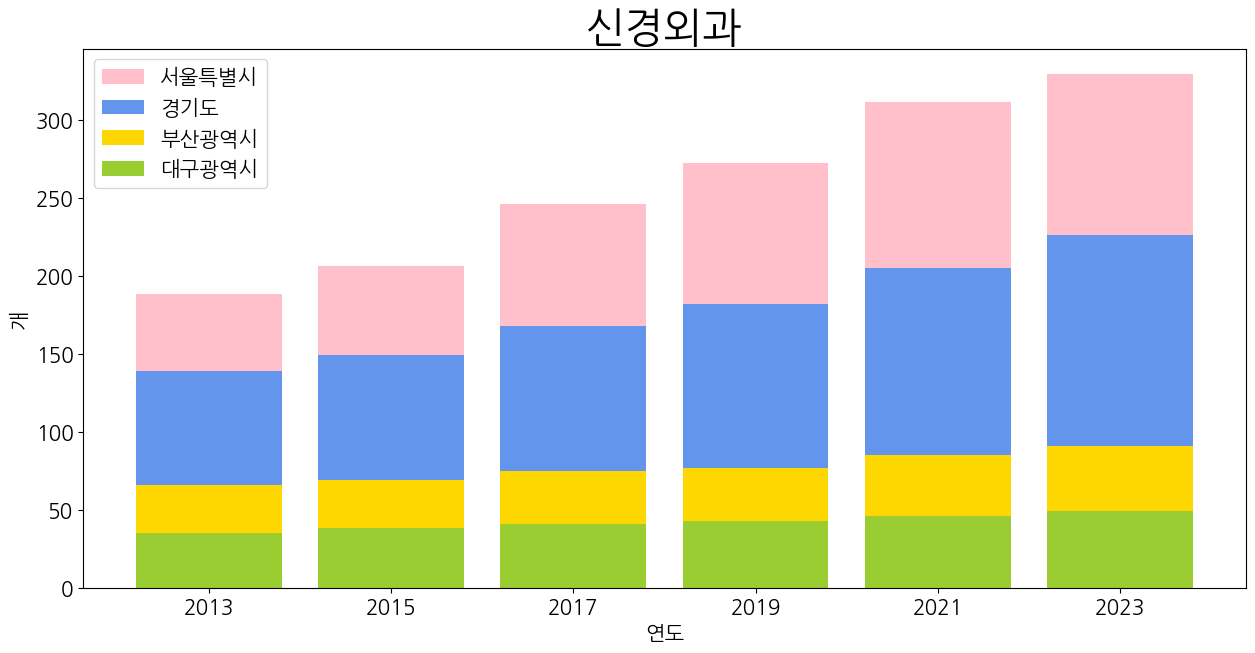

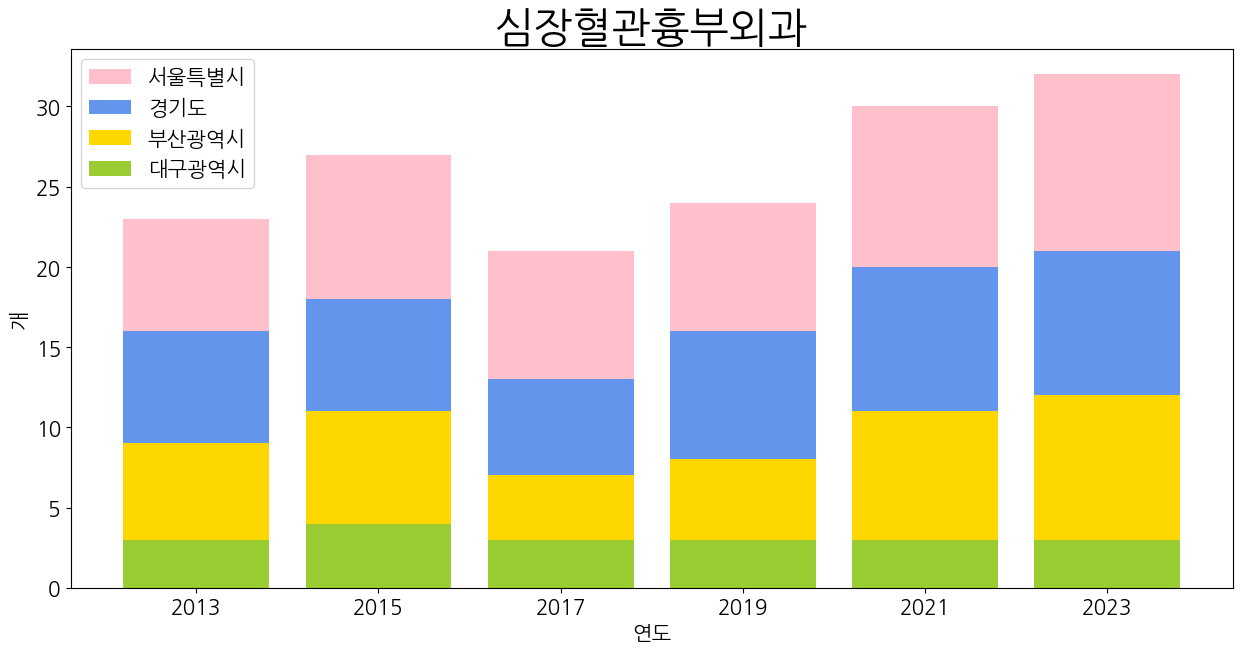

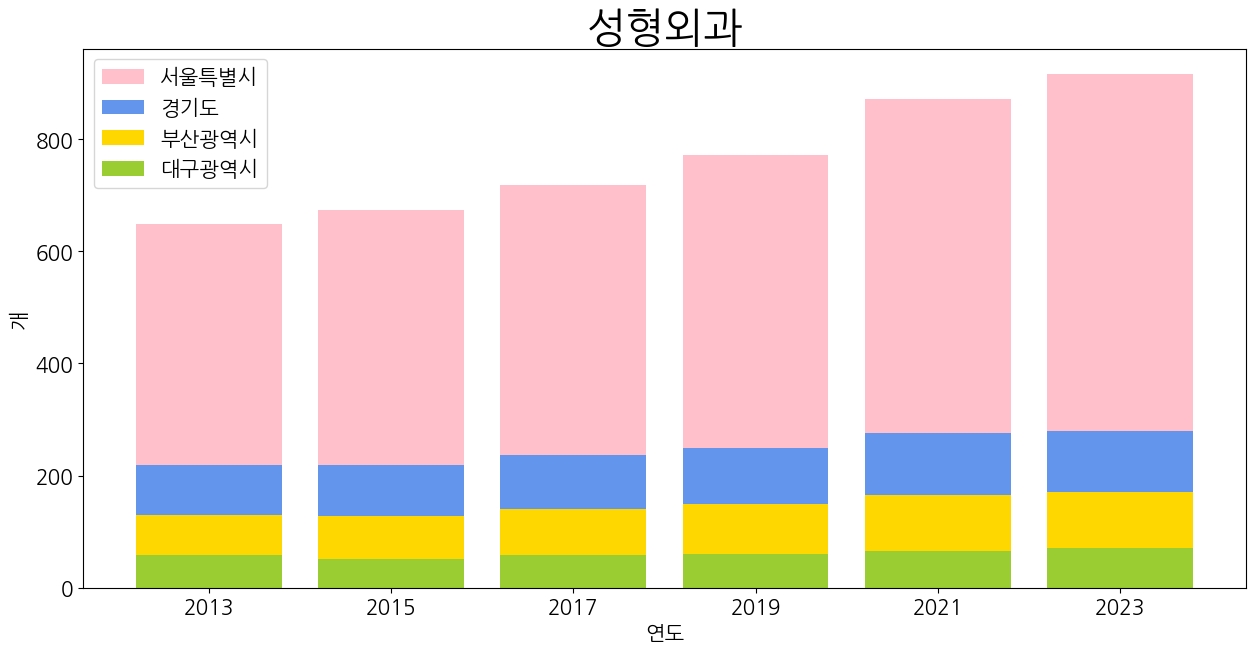

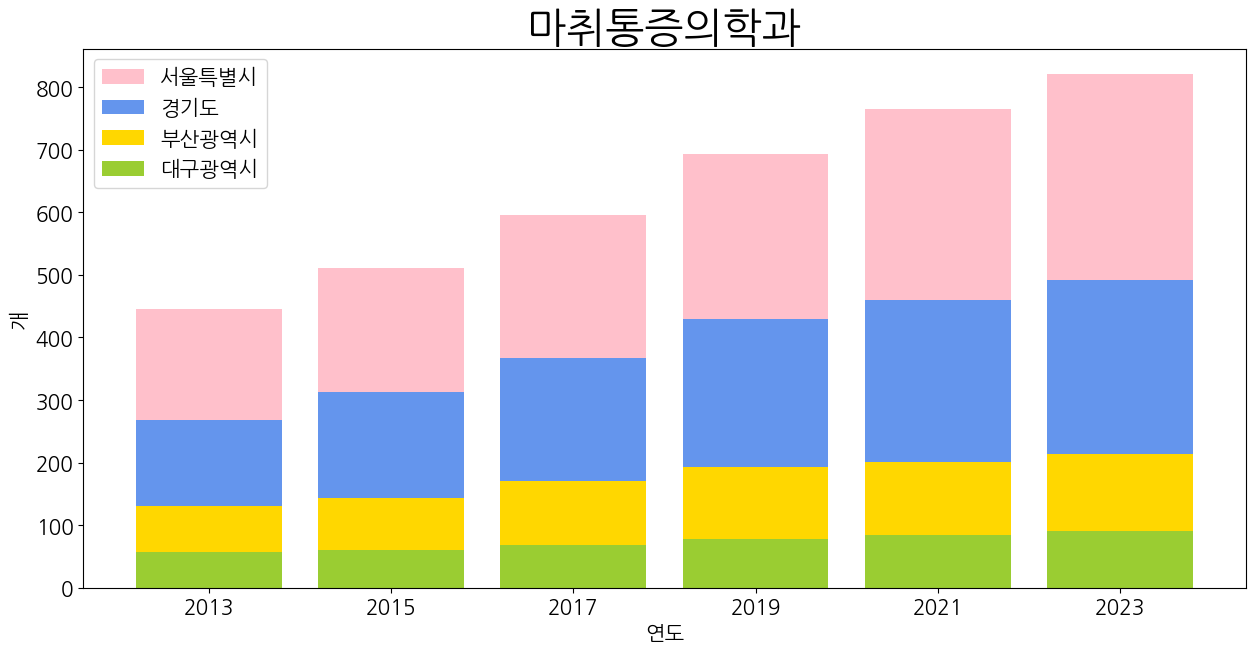

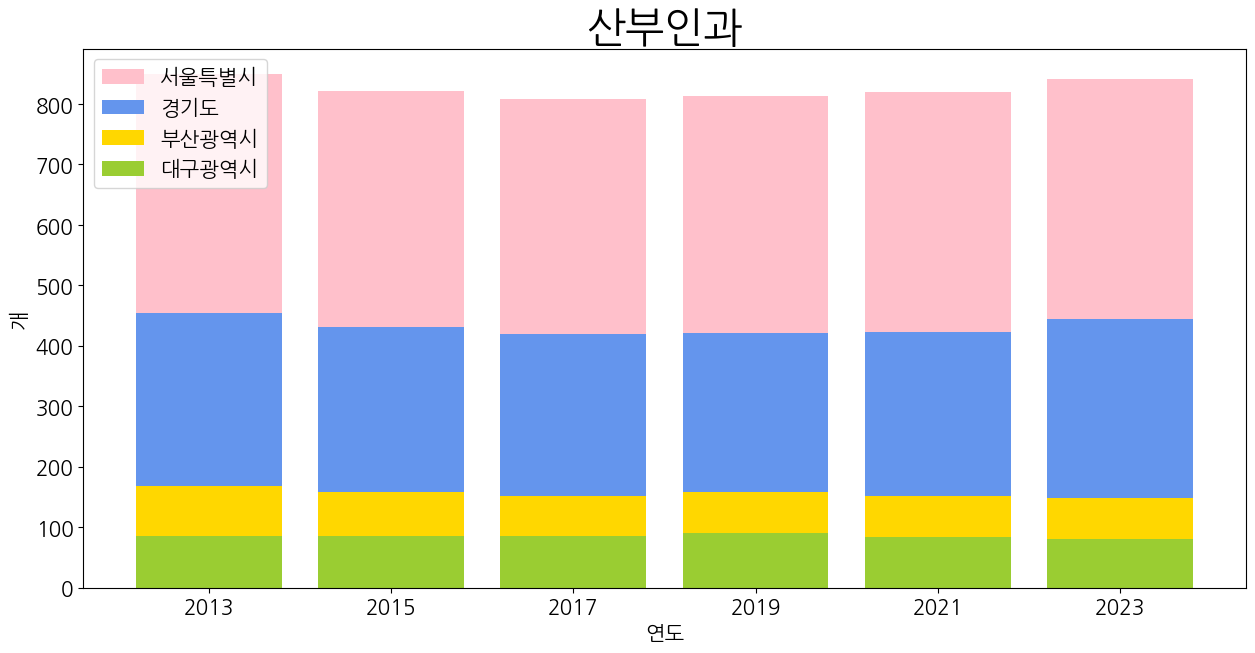

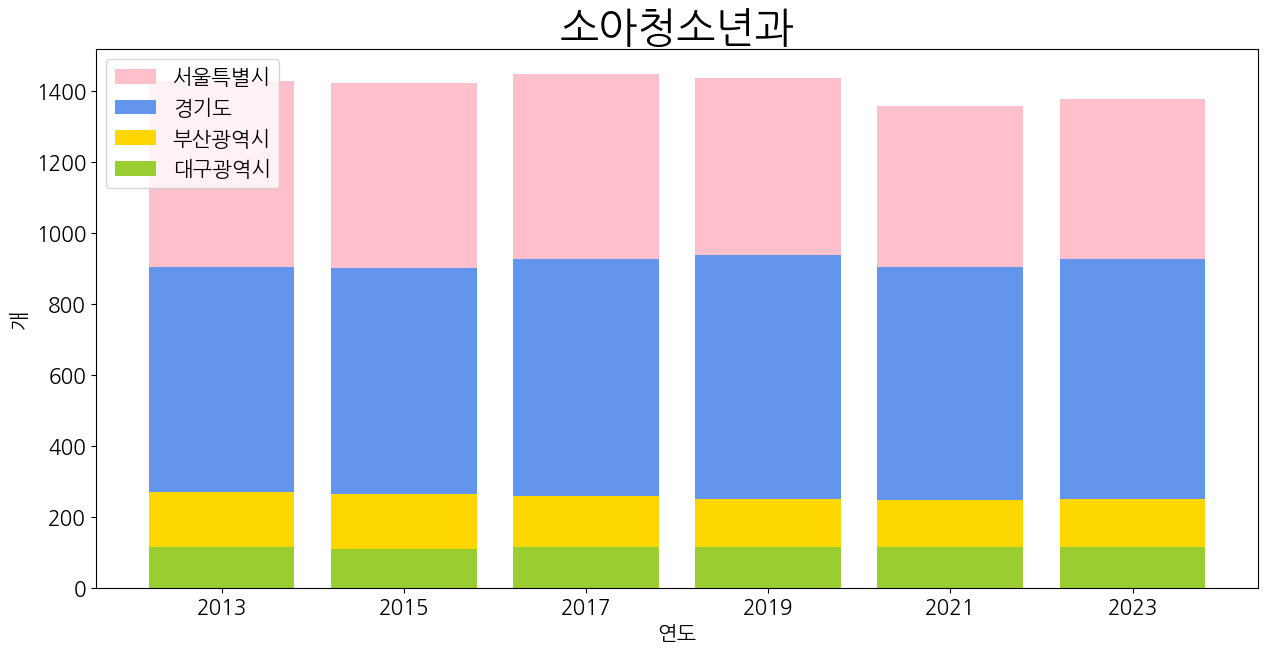

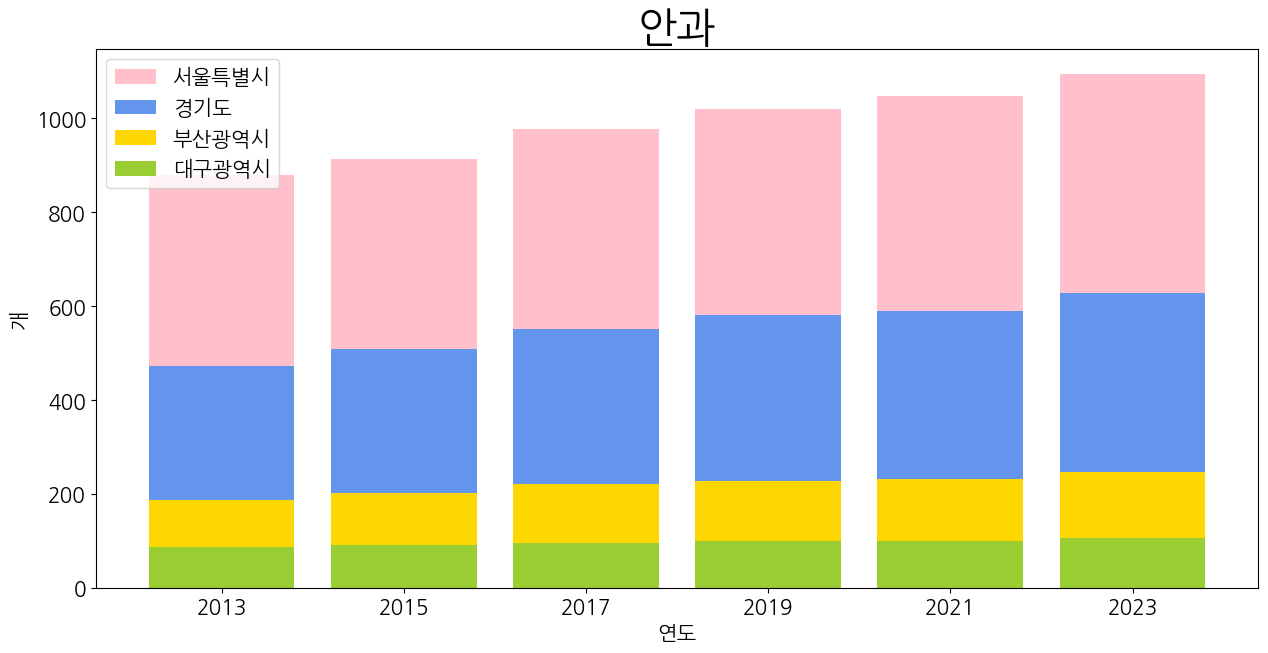

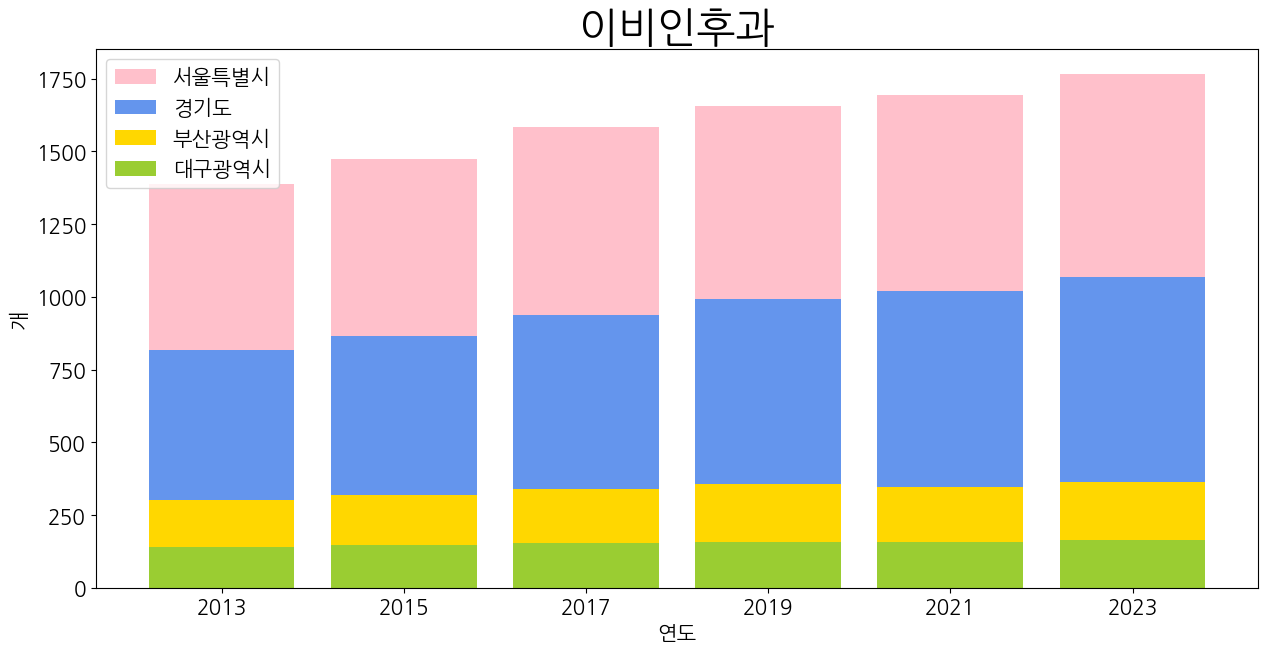

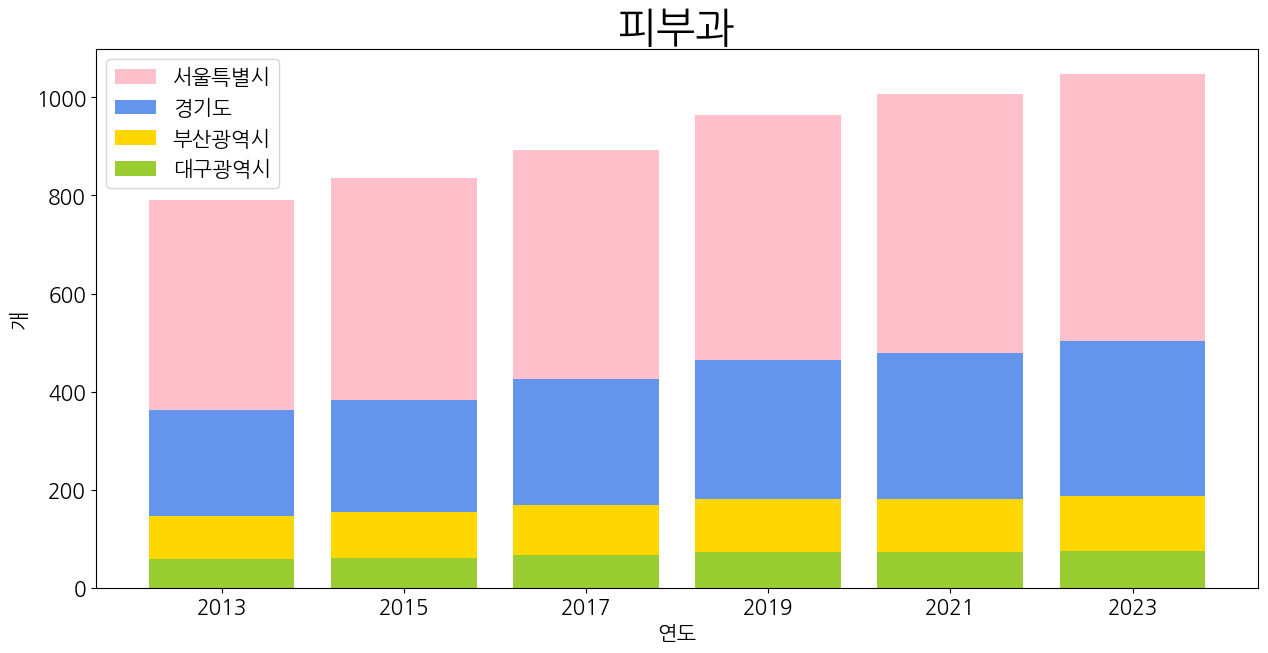

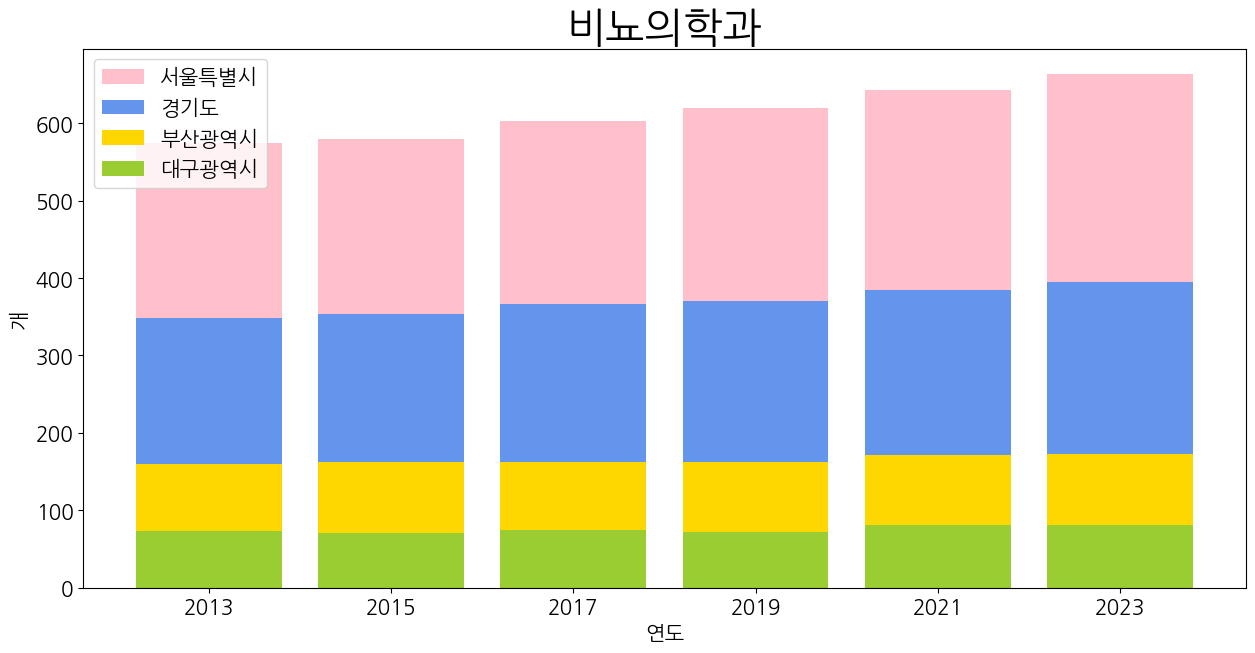

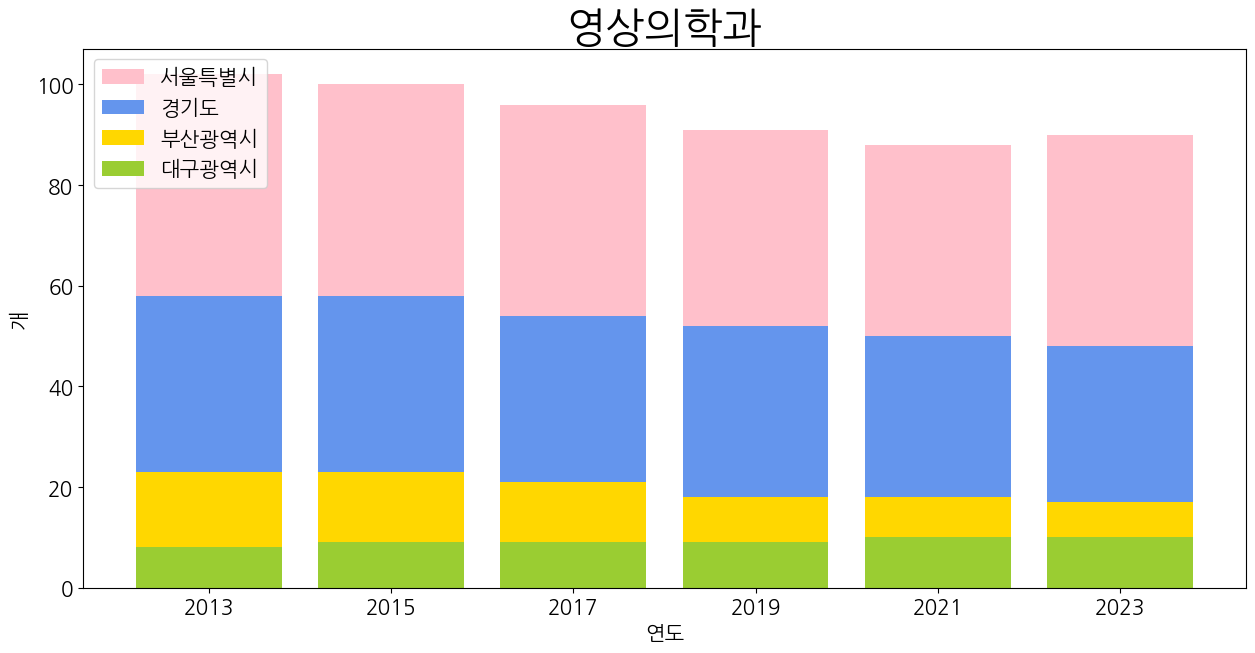

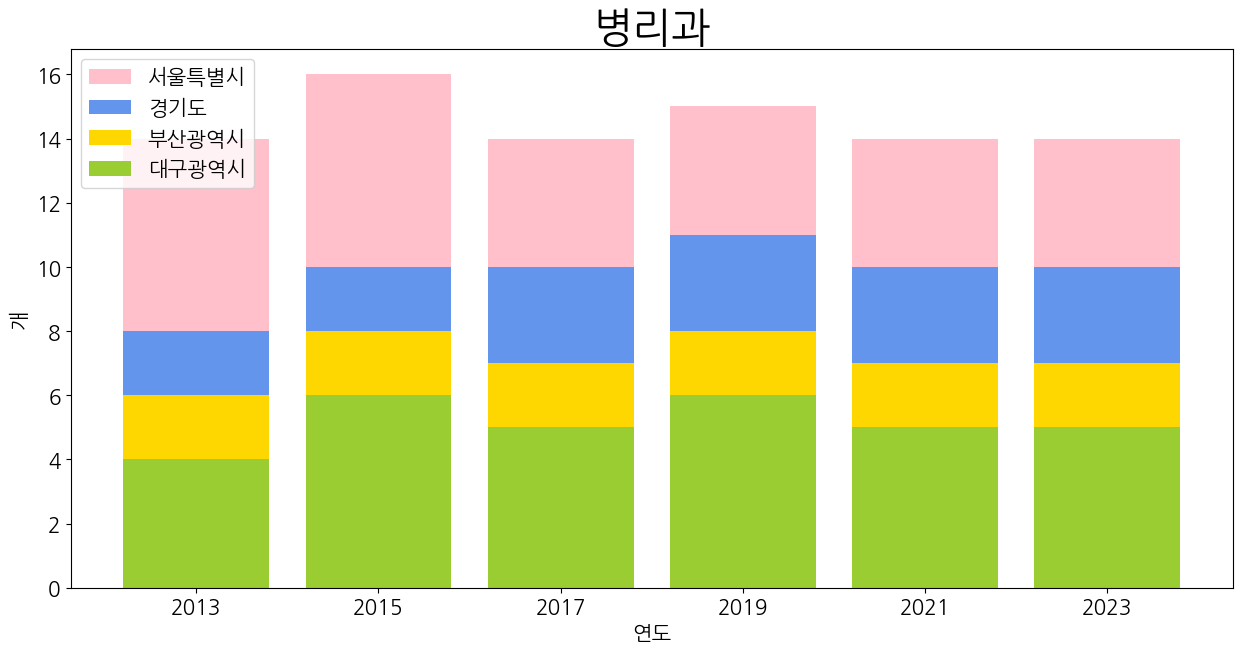

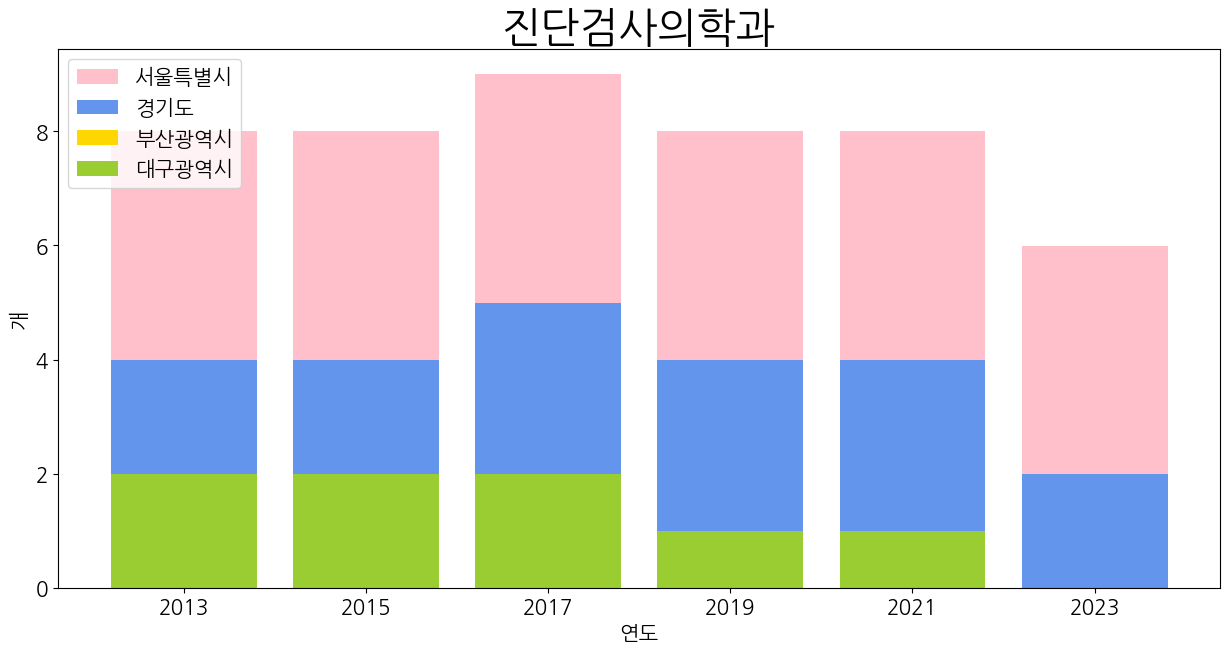

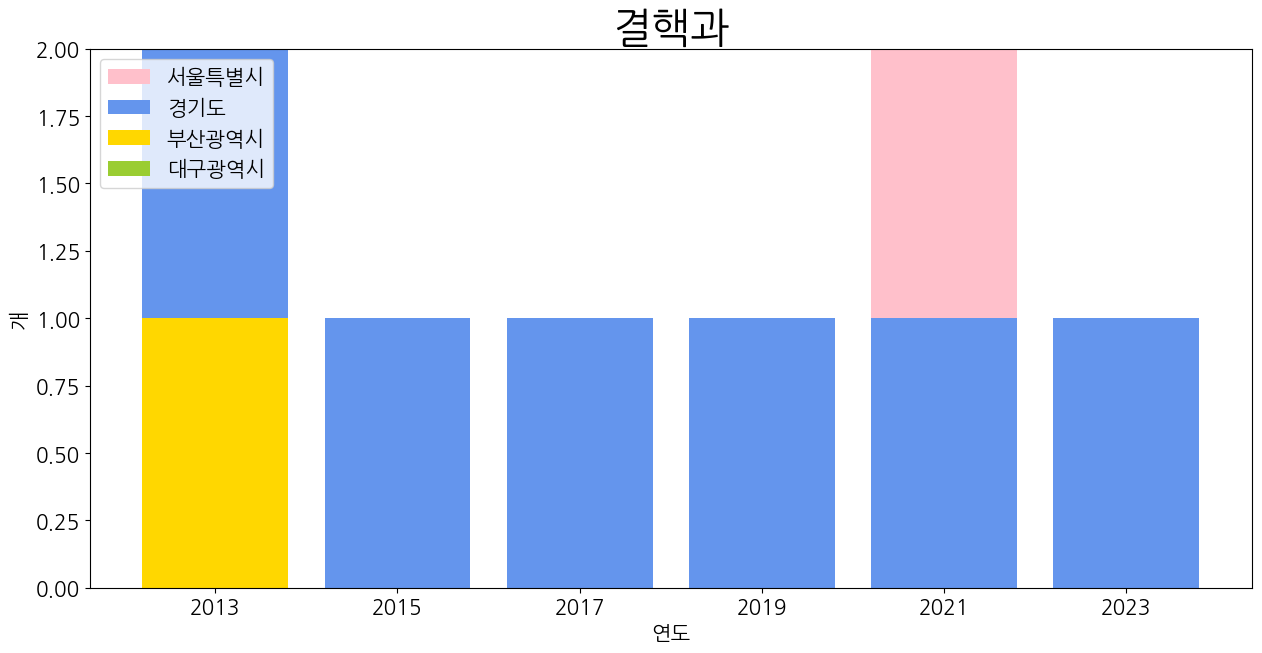

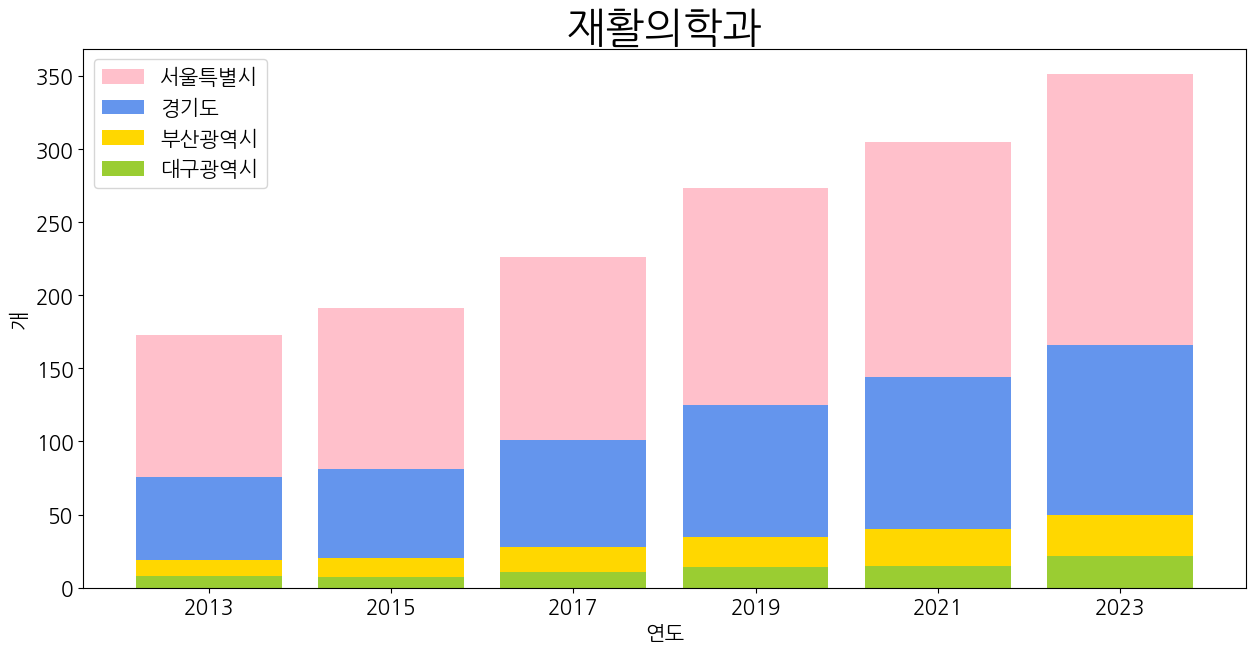

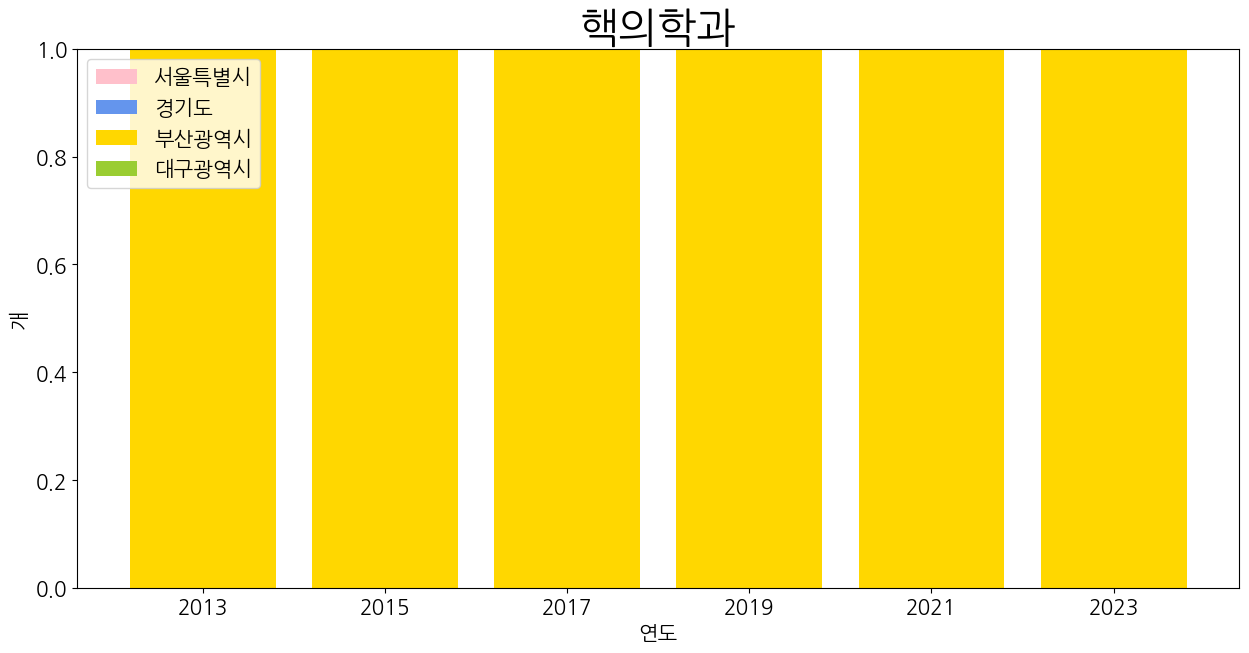

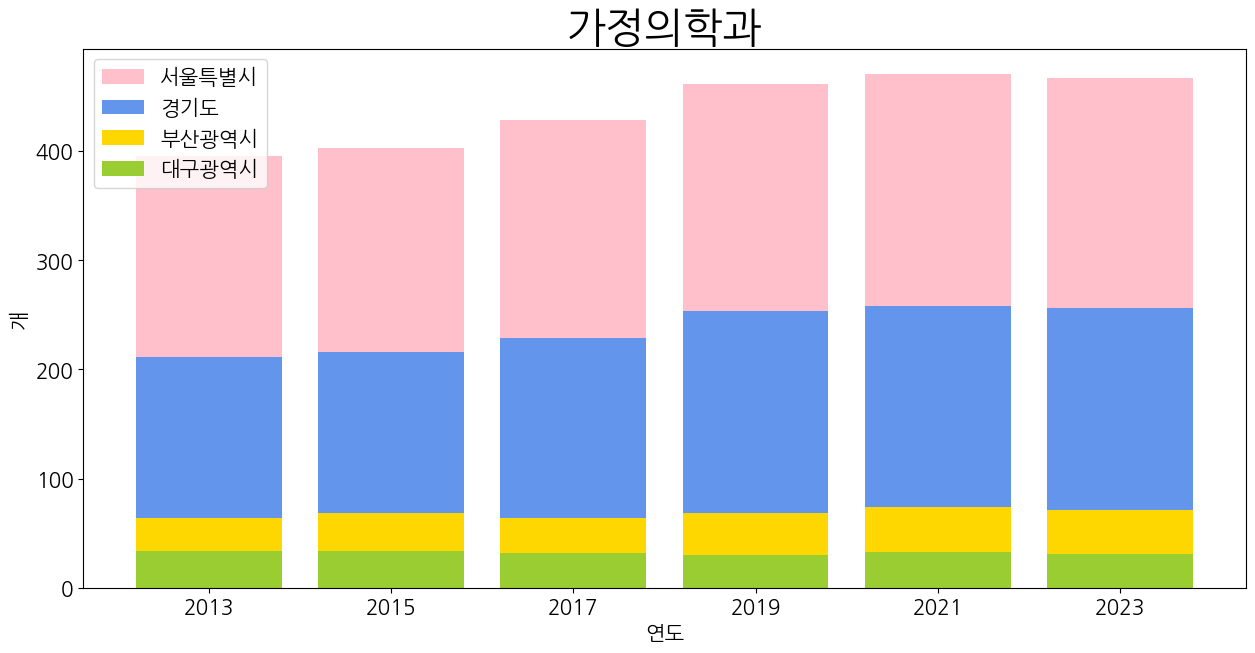

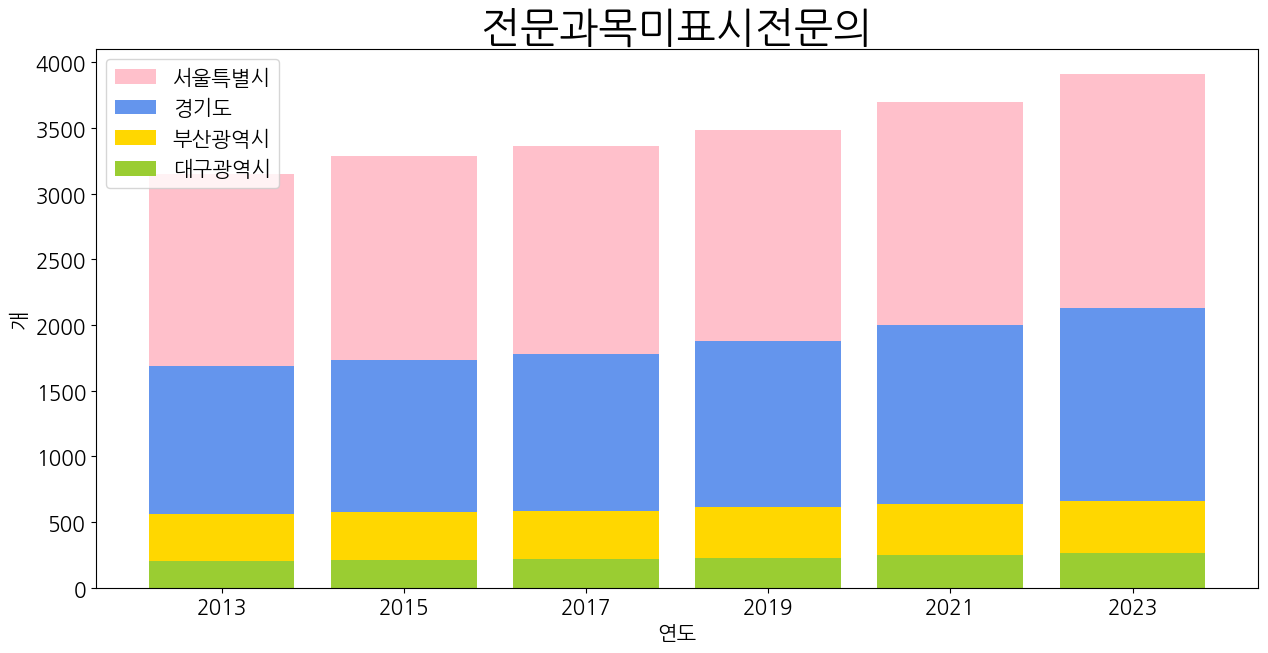

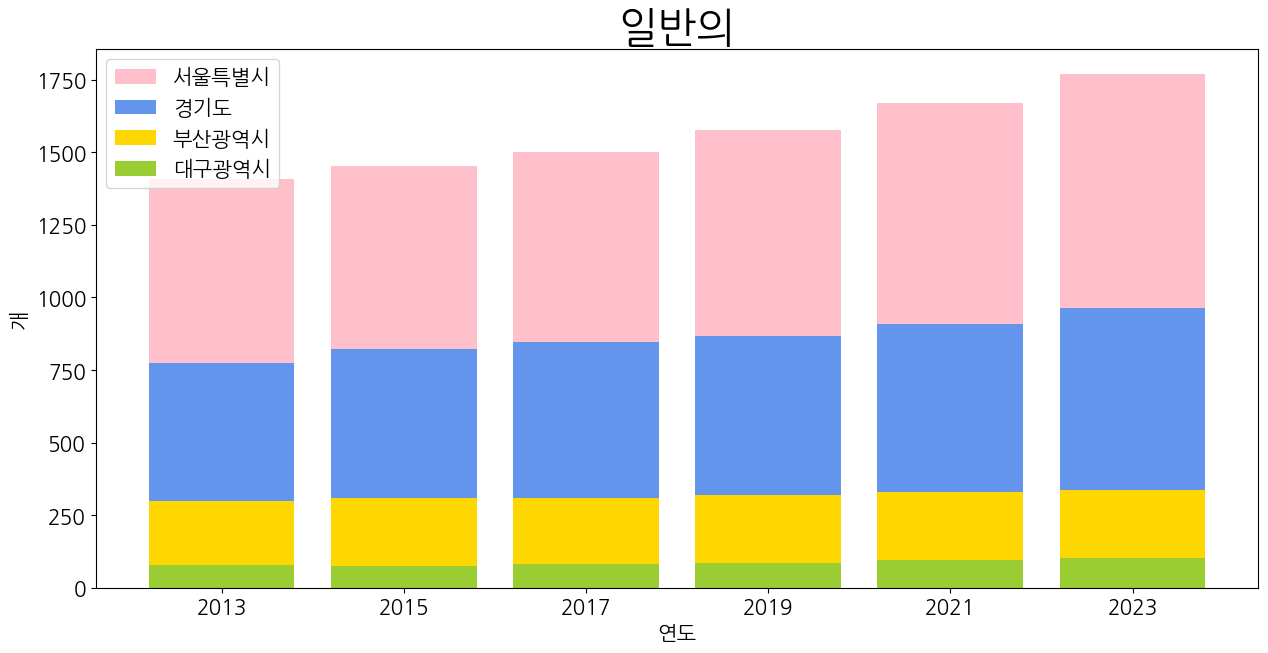

In [172]:
for i in range(len(df_list)):
    draw_graph2(df_list[i], name_list[i])

In [77]:
name_list

['계',
 '내과',
 '신경과',
 '정신건강의학과',
 '외과',
 '정형외과',
 '신경외과',
 '심장혈관흉부외과',
 '성형외과',
 '마취통증의학과',
 '산부인과',
 '소아청소년과',
 '안과',
 '이비인후과',
 '피부과',
 '비뇨의학과',
 '영상의학과',
 '병리과',
 '진단검사의학과',
 '결핵과',
 '재활의학과',
 '핵의학과',
 '가정의학과',
 '전문과목미표시전문의',
 '일반의']

<Axes: >

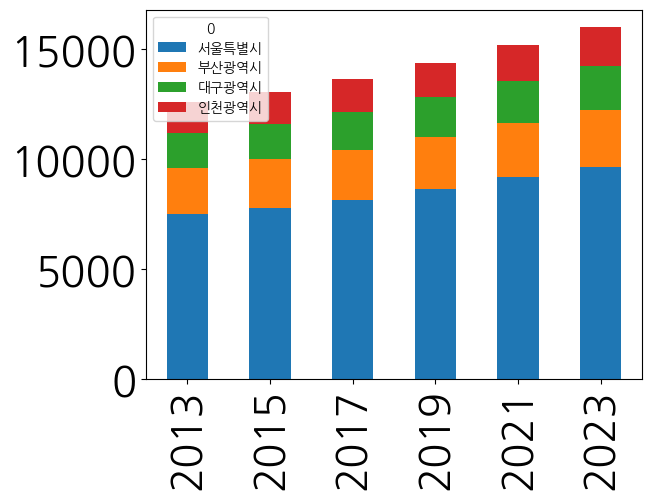

In [103]:
df_list[0]
x = ["2013", "2015", "2017", "2019", "2021", "2023"]
df_list[0].loc[["서울특별시", "부산광역시", "대구광역시", "인천광역시"]].T.plot(kind='bar', stacked=True)

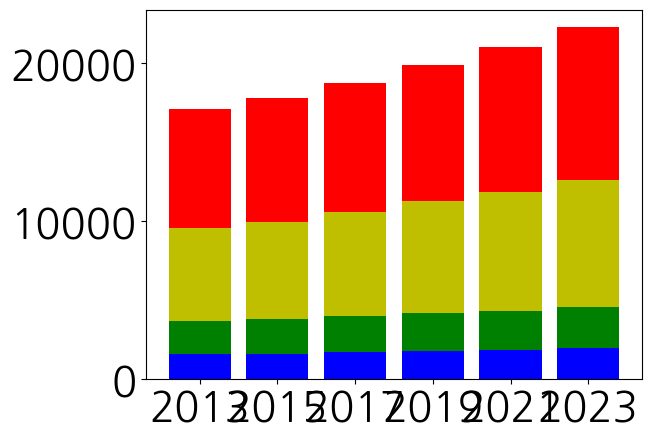

In [113]:
df_list[0].loc[["서울특별시", "부산광역시", "대구광역시", "경기도"]]
# 서울 경기 부산 대구 
sum = 0
p1 = plt.bar(x, df_list[0].loc["대구광역시"], color='b')
sum += df_list[0].loc["대구광역시"]
p2 = plt.bar(x, df_list[0].loc["부산광역시"], color='g', bottom=sum)
sum += df_list[0].loc["부산광역시"]
p3 = plt.bar(x, df_list[0].loc["경기도"], color='y', bottom=sum)
sum += df_list[0].loc["경기도"]
p4 = plt.bar(x, df_list[0].loc["서울특별시"], color='r' ,bottom=sum)
sum += df_list[0].loc["서울특별시"]

In [108]:
df_list[0]

2013   2015   2017   2019   2021   2023
0                                                
계        28328  29488  30938  32491  33912  35580
서울특별시     7505   7802   8155   8628   9189   9669
부산광역시     2119   2198   2279   2384   2468   2588
대구광역시     1576   1615   1712   1803   1884   1971
인천광역시     1384   1444   1496   1573   1633   1772
광주광역시      864    893    915    948    970   1041
대전광역시      995   1026   1057   1078   1112   1114
울산광역시      537    574    592    609    618    633
세종특별자치시     57    100    147    181    198    229
경기도       5876   6159   6600   7065   7487   8048
강원특별자치도    695    717    743    769    782    798
충청북도       775    815    847    891    912    936
충청남도       991   1024   1055   1074   1094   1108
전라북도      1080   1107   1143   1165   1179   1208
전라남도       894    905    931    944    962    966
경상북도      1168   1226   1260   1292   1279   1296
경상남도      1481   1522   1594   1639   1682   1707
제주특별자치도    331    361    412    448    463    496